# 2023-01-01_AJT462_AJT463_Fig3_Redo_TCA
Redid this from 2021-12-07_AJT462_AJT463_Fig3_redo_TCA notebook with the new rate calculations that I did on 2023-01-01

In [2]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
# import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D
from scipy.stats import linregress

## Data Import

In [4]:
with open('Fig3_new_rates.pkl', 'rb') as open_file:
    data = pickle.load(open_file)
    
data=data.replace(to_replace=0, value=0.1)

# added replicate column to make rest of code functional without needing to rework anything
data['replicate'] = [1,2,3]*np.int(len(data['value'])/3)

data   

,variable,value,strain_num,replicate
0,0.1,0.069817,AJT462,1
1,0.1,0.056646,AJT462,2
2,0.1,0.052301,AJT462,3
3,5.0,0.214397,AJT462,1
4,5.0,0.188482,AJT462,2
5,5.0,0.188860,AJT462,3
6,15.0,0.196757,AJT462,1
7,15.0,0.190278,AJT462,2
8,15.0,0.183975,AJT462,3
9,25.0,0.236765,AJT462,1


In [5]:
grouped_df = data.groupby(['strain_num','variable'], as_index=False).agg([np.mean, np.std])


grouped_df = grouped_df['value']
grouped_df = grouped_df.reset_index()

grouped_df

,strain_num,variable,mean,std
0,AJT462,0.1,0.059588,0.009121
1,AJT462,5.0,0.197246,0.014854
2,AJT462,15.0,0.190337,0.006391
3,AJT462,25.0,0.228165,0.007473
4,AJT462,40.0,0.343767,0.009386
5,AJT462,70.0,0.475881,0.010742
6,AJT462,200.0,0.737063,0.095283
7,AJT462,1000.0,1.391068,0.092436
8,AJT463,0.1,1.487187,0.168477
9,AJT463,5.0,0.701828,0.057033


In [5]:
# % store -r AJT269_means_RNAP_store
# % store -r AJT269_stdevs_RNAP_store

# AJT269_stdevs_RNAP_store

In [6]:
% store -r AJT269_means_RPU_store
# % store -r AJT269_stdevs_RPU_store

AJT269_means_RPU_store

0.0       0.021033
5.0       0.029155
15.0      0.078215
25.0      0.243913
40.0      1.477551
70.0      2.390190
200.0     3.184891
1000.0    3.659567
dtype: float64

In [7]:
%store -r means_RPU_AJT312
# %store -r stdevs_RNAP_repressors

means_RPU_AJT312

0.0       11.729450
5.0       11.626840
15.0      11.302176
25.0       2.627198
40.0       0.113178
70.0       0.040731
200.0      0.018853
1000.0     0.013712
dtype: float64

In [8]:
# %store -r means_RNAP_AJT312
# %store -r stdevs_RNAP_repressors

# means_RNAP_AJT312

In [8]:
iptg_plot_conc = [0.0001, 5, 15, 25, 40, 70, 200, 1000]

In [9]:
def hill_eqn_act(x, ymax, ymin, k, n):
    return ymin + ((ymax-ymin) * x**n)/(x**n + k**n)

def hill_eqn_rep(x, ymax, ymin, k, n):
    return ymin + ((ymax-ymin) * k**n)/(x**n + k**n)

def fptac(x):
    # RPUg
    ymin = 0.0213
    ymax = 3.66
    k = 53.66
    n = 3.32
  
    # RNAP/s
#     ymin = 0.0016
#     ymax = 0.27
#     k = 53.66
#     n = 3.32
    return hill_eqn_act(x, ymax, ymin, k, n)

def fphlf(x):
    # RPUg
    ymin = 0.0046 #Chris asked for it to be 2-3 fold higher
    ymax = 11.73
    k = .15
    n =  2.16
    
    # RNAP/s
# #     ymin = 0.0003
#     ymin = 0.0006 #Chris asked for it to be 2-3 fold higher
#     ymax = 0.86
#     k = .01
#     n =  2.16
    return hill_eqn_rep(x, ymax, ymin, k, n)

def ftca(x):
#     # RPUg
#     ymin = 0.12
#     ymax = 1.3
#     k = 0.27/0.076
#     n = 2.5
    
    # RPUg new rates
    ymin = 0.2
    ymax = 1.7
    k = (0.27/0.076)*1.15
    n = 2.5
    
    # RNAP/s
#     ymin = 0.12
#     ymax = 1.3
#     k = 0.27
#     n = 2.5
    return hill_eqn_act(x, ymax, ymin, k, n)

# def ftca_second(x):
#     ymin = -0.02
#     ymax = 0.0925
#     k = 0.00575
#     n = 0.5
# #     # PTac-TCA to (0,0)
# #     ymin = 0.0
# #     ymax = 1
# #     k = 0.001
# #     n = 0.5
#     return hill_eqn_act(x, ymax, ymin, k, n)

# transition = 0.018 # works well for second time through linear fit

# def ftca_linear(x):
#     m = (0.09-ftca(transition))/(np.log10(3)-np.log10(transition))
#     b = (0.09-m*np.log10(3))
# #     print(m,b)
#     return(m*np.log10(x) + b)

def sim_circuit(iptg_plot_conc):
    #TCA is output
    #phlf output = input for tca
    #ptac output = input for phlf
    
    ptac_out = fptac(iptg_plot_conc) #output in rnap/s
    phlf_out = fphlf(ptac_out)
    
    tca_out = ftca(phlf_out)
    return tca_out

# def sim_circuit_second(iptg_plot_conc):
#     ptac_out = fptac(iptg_plot_conc) #output in rnap/s
#     phlf_out = fphlf(ptac_out)
    
#     tca_out = ftca_second(phlf_out)
#     return tca_out

# def sim_circuit_linear(iptg_plot_conc):
#     ptac_out = fptac(iptg_plot_conc) #output in rnap/s
#     phlf_out = fphlf(ptac_out)
    
#     tca_out = ftca_linear(phlf_out)
#     return tca_out

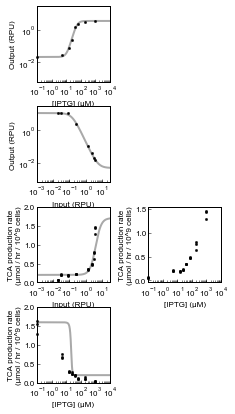

In [10]:
# RPU as x

## TO DO ##
# plot curve fits


# sns.set_style('ticks', {"xtick.direction": "in","ytick.direction": "in"})

strains = ['AJT269','AJT312','AJT462','AJT463']
reps = [1,2,3]
iptg_plot_conc2 = [0.1]+iptg_plot_conc[1:]

rows = len(strains)
cols = 2
fig, ax = plt.subplots(rows,cols, figsize=(1.62*cols,1.45*rows)) # 2 columns
plt.tight_layout(h_pad=0.5) #tidies up spacing between plots

for s in strains:

    FP = ax[strains.index(s)][0]
    
    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

          
    FP.set_xscale('log')
    FP.set_yscale('log')
    FP.grid(False)

    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')    
    
    
    if s == 'AJT269':
        FP.scatter(iptg_plot_conc2, AJT269_means_RPU_store, color = 'black',
               linewidths = 0.5, marker = 'o', s = 5, zorder = 11, clip_on=False)
        
#         FP.errorbar(iptg_plot_conc2, AJT269_means_RPU_store, yerr = AJT269_stdevs_RNAP_store,
#                     zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)

        xvals = np.logspace(-1, 4, 1000)
        FP.plot(xvals, fptac(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        FP.set_ylabel('Output (RPU)', size = 8, labelpad = 2)

        FP.set_ylim(0.0006, 30)
        FP.set_xlim(0.1, 10000)

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    elif s == 'AJT312':
        FP.scatter(AJT269_means_RPU_store, means_RPU_AJT312, color = 'black',
               linewidths = 0.5, marker = 'o', s = 5, zorder = 11, clip_on=False)
        
#         FP.errorbar(AJT269_means_RPU_store,means_RNAP_AJT312, yerr = stdevs_RNAP_repressors[s],
#                     zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
        xvals = np.logspace(-3, 30, 1000)
        FP.plot(xvals, fphlf(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        FP.set_xlabel('Input (RPU)', size = 8, labelpad = 2)
        FP.set_ylabel('Output (RPU)', size = 8, labelpad = 2)
        
        FP.set_xlim(0.001, 30)
        FP.set_ylim(0.0006, 30)
        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        

    
    # sns.scatterplot(data=grouped_df, x='concentration',y='mean',
    #                 ax=ax, hue='strain_num',legend=False,
    #                zorder=10,clip_on=False, s=5)#, ci='std')#, err_style='bars')
    elif s == 'AJT462':
    
#         # IPTG as x
#         plot_data = grouped_df[grouped_df['strain_num']==s]

#         FP.scatter(x=plot_data['concentration'], y=plot_data['mean'],
#                   color ='black', linewidths = 0.5, marker = 'o', s = 5,
#                   zorder=11, clip_on=False)

#         FP.errorbar(x=plot_data['concentration'], y=plot_data['mean'],
#                     yerr = plot_data['std'],
#                     fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     zorder=11, clip_on=False)
        
#         FP.set_yscale('linear')
#         FP.set_xscale('log')

#         FP.grid(False)

#         FP.set_xlim(0.1,10000)

#         FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', 
#                       size=8, labelpad=2)
#         FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)


        # RPUg as x
        plot_data_x = AJT269_means_RPU_store.tolist()
#         plot_data_y = grouped_df[grouped_df['strain_num']==s]['mean'].tolist()
# #         plot_data_x = [0.0001]+AJT269_means_RNAP_store.tolist()
# #         plot_data_y = [0.0001]+grouped_df[grouped_df['strain_num']==s]['mean'].tolist()
#         plot_data_yerr = grouped_df[grouped_df['strain_num']==s]['std'].tolist()

#         display(plot_data_x, plot_data_y, plot_data_yerr)
        
        
        for r in reps:
            plot_data = data[data['strain_num']=='AJT462']
            plot_data = plot_data[plot_data['replicate'] == r]
    
            FP.scatter(x=plot_data_x, y=plot_data['value'],
                      color ='black', linewidths = 0.5, marker = 'o', s = 5,
                      zorder=11, clip_on=False)
        
#         FP.errorbar(x=plot_data_x, y=plot_data_y,
#                     yerr = plot_data_yerr,
#                     fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     zorder=11, clip_on=False)
        
        xvals = np.logspace(-3, np.log10(30), 1000)
        FP.plot(xvals, ftca(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        
        FP.set_yscale('linear')
        FP.set_xscale('log')

        FP.grid(False)

        FP.set_xlim(0.001, 30)
        FP.set_ylim(0,2)
        
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', 
                      size=8, labelpad=2)
        FP.set_xlabel('Input (RPU)', size = 8, labelpad = 2)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')  

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        
         ######## second column
        FP2 = ax[2][1]
        # make plot borders black and specified thickness
        for spine in FP2.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
        
        # IPTG as x
        plot_data = grouped_df[grouped_df['strain_num']==s]

        for r in reps:
            plot_data = data[data['strain_num']=='AJT462']
            plot_data = plot_data[plot_data['replicate'] == r]
            
            FP2.scatter(x=plot_data['variable'], y=plot_data['value'],
                      color ='black', linewidths = 0.5, marker = 'o', s = 5,
                      zorder=11, clip_on=False)

#         FP2.errorbar(x=plot_data['concentration'], y=plot_data['mean'],
#                     yerr = plot_data['std'],
#                     fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     zorder=11, clip_on=False)
        
        FP2.set_yscale('linear')
        FP2.set_xscale('log')

        FP2.grid(False)

        FP2.set_xlim(0.1,10000)

        FP2.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', 
                      size=8, labelpad=2)
        FP2.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        
        
#         FP2.scatter([0]+iptg_plot_conc2[:],[[0]+TCA_rate_means_all[s].tolist()], color ='black',
#                   linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
#         FP2.errorbar([0]+iptg_plot_conc2[:],[0]+TCA_rate_means_all[s].tolist(), yerr = [0.00001]+TCA_rate_stdevs_all[s].tolist(),
#                     zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
#         xvals2 = np.logspace(-1, 4, 1000)
#         FP2.plot(xvals2, ftca(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
    
       
        FP2.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP2.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')  
        
#         FP2.set_yticks([0,0.02,0.04,0.06,0.08,0.1])
        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP2.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP2.xaxis.set_minor_locator(x_minor)
        FP2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())     
        
        
    elif s == 'AJT463':

        reps = [1,2,3]
        markers = ['o','s','d']
        
        # IPTG as x
        for r in reps:
            
            # had to do both inside loop or else second and third replicates had no data
            plot_data = data[data['strain_num']=='AJT463']
            plot_data = plot_data[plot_data['replicate'] == r]
            
            FP.scatter(x=plot_data['variable'], y=plot_data['value'],
                       color ='black', linewidths = 0.5, 
                       marker = 'o', s = 5, 
                       zorder = 11, clip_on = False, 
                       label = r)
            
#         xvals = np.logspace(-1, np.log10(38), 1000) ## 43.5 worked well for first time with linear plot as second half
#         FP.plot(xvals, sim_circuit_linear(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
        
        xvals = np.logspace(-1,4,1000) ## 43.5 worked well for first time with linear plot as second half
        FP.plot(xvals, sim_circuit(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
    
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        FP.set_yscale('linear')
        FP.set_xscale('log')
        
#         FP.set_ylim(0, 1)
#         FP.set_ylim(0.005, 0.3)
        FP.set_xlim(0.1, 10000)
        FP.set_ylim(0,2)
                        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())    
        
#         # RNAP from Ptac as x
#         for r in reps:
            
#             # had to do both inside loop or else second and third replicates had no data
#             plot_data = data[data['strain_num']=='AJT463']
#             plot_data = plot_data[plot_data['replicate'] == r]
            
#             FP.scatter(x=plot_data_x, y=plot_data['value'],
#                        color ='black', linewidths = 0.5, 
#                        marker = markers[reps.index(r)], s = 5, 
#                        zorder = 10, clip_on = False, 
#                        label = r)
            
# #         xvals = np.logspace(-1, np.log10(38), 1000) ## 43.5 worked well for first time with linear plot as second half
# #         FP.plot(xvals, sim_circuit_linear(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
        
#         xvals = np.logspace(-1, 4, 1000)
#         FP.plot(fptac(xvals), sim_circuit(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
    
#         FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
#         FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

#         FP.set_yscale('linear')
#         FP.set_xscale('log')
        
# #         FP.set_ylim(0, 1)
# #         FP.set_ylim(0.005, 0.3)
#         FP.set_xlim(0.0001, 3)
#         FP.set_ylim(0,1.7)
        
        
#         # RNAP from PhlF as x
#         for r in reps:
            
#             # had to do both inside loop or else second and third replicates had no data
#             plot_data = data[data['strain_num']=='AJT463']
#             plot_data = plot_data[plot_data['replicate'] == r]
            
#             FP.scatter(x=means_RNAP_AJT312, y=plot_data['value'],
#                        color ='black', linewidths = 0.5, 
#                        marker = markers[reps.index(r)], s = 5, 
#                        zorder = 10, clip_on = False, 
#                        label = r)
            
# #         xvals = np.logspace(-1, np.log10(38), 1000) ## 43.5 worked well for first time with linear plot as second half
# #         FP.plot(xvals, sim_circuit_linear(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
        
#         xvals = np.logspace(-1, 4, 1000)
#         FP.plot(fphlf(fptac(xvals)), sim_circuit(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
    
#         FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
#         FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

#         FP.set_yscale('linear')
#         FP.set_xscale('log')
        
# #         FP.set_ylim(0, 1)
# #         FP.set_ylim(0.005, 0.3)
#         FP.set_xlim(0.0001, 3)
#         FP.set_ylim(0,1.7)
                        
#         ## set x ticks
#         x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
#         FP.xaxis.set_major_locator(x_major)
#         x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#         FP.xaxis.set_minor_locator(x_minor)
#         FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter()) 
        
#         FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#         FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in') 
        
        
fig.delaxes(ax[0][1])
fig.delaxes(ax[1][1])
fig.delaxes(ax[3][1])


In [49]:
# fig.savefig('Fig3D_3G_Simulated_circuit_new_rates.pdf', bbox_inches = "tight", transparent = True)


NameError: name 'AJT269_stdevs_RPU_store' is not defined

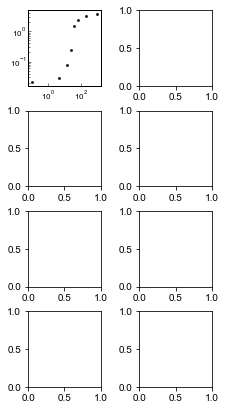

In [33]:
# RNAP as x

## TO DO ##
# plot curve fits


# sns.set_style('ticks', {"xtick.direction": "in","ytick.direction": "in"})

strains = ['AJT269','AJT312','AJT462','AJT463']
iptg_plot_conc2 = [0.1]+iptg_plot_conc[1:]

rows = len(strains)
cols = 2
fig, ax = plt.subplots(rows,cols, figsize=(1.62*cols,1.45*rows)) # 2 columns
plt.tight_layout(h_pad=0.5) #tidies up spacing between plots

for s in strains:

    FP = ax[strains.index(s)][0]
    
    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

          
    FP.set_xscale('log')
    FP.set_yscale('log')
    FP.grid(False)

    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')    
    
    
    if s == 'AJT269':
        FP.scatter(iptg_plot_conc2, AJT269_means_RPU_store, color = 'black',
               linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
        FP.errorbar(iptg_plot_conc2, AJT269_means_RPU_store, yerr = AJT269_stdevs_RPU_store,
                    zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)

        xvals = np.logspace(-1, 4, 1000)
        FP.plot(xvals, fptac(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        FP.set_ylabel('Output (RPU)', size = 8, labelpad = 2)

        FP.set_ylim(0.0001, 3)
        FP.set_xlim(0.1, 10000)

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    elif s == 'AJT312':
        FP.scatter(AJT269_means_RPU_store, means_RPU_AJT312, color = 'black',
               linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
        FP.errorbar(AJT269_means_RPU_store,means_RPU_AJT312, yerr = stdevs_RNAP_repressors[s],
                    zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
        xvals = np.logspace(-4, 1, 1000)
        FP.plot(xvals, fphlf(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        FP.set_xlabel('Input (RPU)', size = 8, labelpad = 2)
        FP.set_ylabel('Output (RPU)', size = 8, labelpad = 2)
        
        FP.set_ylim(0.0001, 3)
        FP.set_xlim(0.0001, 3)
        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        

    
    # sns.scatterplot(data=grouped_df, x='concentration',y='mean',
    #                 ax=ax, hue='strain_num',legend=False,
    #                zorder=10,clip_on=False, s=5)#, ci='std')#, err_style='bars')
    elif s == 'AJT462':
    
#         # IPTG as x
#         plot_data = grouped_df[grouped_df['strain_num']==s]

#         FP.scatter(x=plot_data['concentration'], y=plot_data['mean'],
#                   color ='black', linewidths = 0.5, marker = 'o', s = 5,
#                   zorder=11, clip_on=False)

#         FP.errorbar(x=plot_data['concentration'], y=plot_data['mean'],
#                     yerr = plot_data['std'],
#                     fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     zorder=11, clip_on=False)
        
#         FP.set_yscale('linear')
#         FP.set_xscale('log')

#         FP.grid(False)

#         FP.set_xlim(0.1,10000)

#         FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', 
#                       size=8, labelpad=2)
#         FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)


        # RNAP flux as x
        plot_data_x = AJT269_means_RPU_store.tolist()
        plot_data_y = grouped_df[grouped_df['strain_num']==s]['mean'].tolist()
#         plot_data_x = [0.0001]+AJT269_means_RNAP_store.tolist()
#         plot_data_y = [0.0001]+grouped_df[grouped_df['strain_num']==s]['mean'].tolist()
        plot_data_yerr = grouped_df[grouped_df['strain_num']==s]['std'].tolist()

#         display(plot_data_x, plot_data_y, plot_data_yerr)
        
        FP.scatter(x=plot_data_x, y=plot_data_y,
                  color ='black', linewidths = 0.5, marker = 'o', s = 5,
                  zorder=11, clip_on=False)
        
        FP.errorbar(x=plot_data_x, y=plot_data_y,
                    yerr = plot_data_yerr,
                    fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
                    zorder=11, clip_on=False)
        
        xvals = np.logspace(-4, np.log10(3), 1000)
        FP.plot(xvals, ftca(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        
        FP.set_yscale('linear')
        FP.set_xscale('log')

        FP.grid(False)

        FP.set_xlim(0.0001, 3) 
        FP.set_ylim(0,1.5)
        
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', 
                      size=8, labelpad=2)
        FP.set_xlabel('Input (RPU)', size = 8, labelpad = 2)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')  

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        
         ######## second column
        FP2 = ax[2][1]
        # make plot borders black and specified thickness
        for spine in FP2.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
        
        # IPTG as x
        plot_data = grouped_df[grouped_df['strain_num']==s]

        FP2.scatter(x=plot_data['concentration'], y=plot_data['mean'],
                  color ='black', linewidths = 0.5, marker = 'o', s = 5,
                  zorder=11, clip_on=False)

        FP2.errorbar(x=plot_data['concentration'], y=plot_data['mean'],
                    yerr = plot_data['std'],
                    fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
                    zorder=11, clip_on=False)
        
        FP2.set_yscale('linear')
        FP2.set_xscale('log')

        FP2.grid(False)

        FP2.set_xlim(0.1,10000)

        FP2.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', 
                      size=8, labelpad=2)
        FP2.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        
        
#         FP2.scatter([0]+iptg_plot_conc2[:],[[0]+TCA_rate_means_all[s].tolist()], color ='black',
#                   linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
#         FP2.errorbar([0]+iptg_plot_conc2[:],[0]+TCA_rate_means_all[s].tolist(), yerr = [0.00001]+TCA_rate_stdevs_all[s].tolist(),
#                     zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
#         xvals2 = np.logspace(-1, 4, 1000)
#         FP2.plot(xvals2, ftca(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
    
       
        FP2.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP2.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')  
        
#         FP2.set_yticks([0,0.02,0.04,0.06,0.08,0.1])
        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP2.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP2.xaxis.set_minor_locator(x_minor)
        FP2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())     
        
        
    elif s == 'AJT463':

        reps = [1,2,3]
        markers = ['o','s','d']
        
        # IPTG as x
        for r in reps:
            
            # had to do both inside loop or else second and third replicates had no data
            plot_data = data[data['strain_num']=='AJT463']
            plot_data = plot_data[plot_data['replicate'] == r]
            
            FP.scatter(x=plot_data['concentration'], y=plot_data['value'],
                       color ='black', linewidths = 0.5, 
                       marker = markers[reps.index(r)], s = 5, 
                       zorder = 10, clip_on = False, 
                       label = r)
            
#         xvals = np.logspace(-1, np.log10(38), 1000) ## 43.5 worked well for first time with linear plot as second half
#         FP.plot(xvals, sim_circuit_linear(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
        
        xvals = np.logspace(-1,4,1000) ## 43.5 worked well for first time with linear plot as second half
        FP.plot(xvals, sim_circuit(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
    
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        FP.set_yscale('linear')
        FP.set_xscale('log')
        
#         FP.set_ylim(0, 1)
#         FP.set_ylim(0.005, 0.3)
        FP.set_xlim(0.1, 10000)
        FP.set_ylim(0,1.5)
                        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())    
        
#         # RNAP from Ptac as x
#         for r in reps:
            
#             # had to do both inside loop or else second and third replicates had no data
#             plot_data = data[data['strain_num']=='AJT463']
#             plot_data = plot_data[plot_data['replicate'] == r]
            
#             FP.scatter(x=plot_data_x, y=plot_data['value'],
#                        color ='black', linewidths = 0.5, 
#                        marker = markers[reps.index(r)], s = 5, 
#                        zorder = 10, clip_on = False, 
#                        label = r)
            
# #         xvals = np.logspace(-1, np.log10(38), 1000) ## 43.5 worked well for first time with linear plot as second half
# #         FP.plot(xvals, sim_circuit_linear(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
        
#         xvals = np.logspace(-1, 4, 1000)
#         FP.plot(fptac(xvals), sim_circuit(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
    
#         FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
#         FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

#         FP.set_yscale('linear')
#         FP.set_xscale('log')
        
# #         FP.set_ylim(0, 1)
# #         FP.set_ylim(0.005, 0.3)
#         FP.set_xlim(0.0001, 3)
#         FP.set_ylim(0,1.7)
        
        
#         # RNAP from PhlF as x
#         for r in reps:
            
#             # had to do both inside loop or else second and third replicates had no data
#             plot_data = data[data['strain_num']=='AJT463']
#             plot_data = plot_data[plot_data['replicate'] == r]
            
#             FP.scatter(x=means_RNAP_AJT312, y=plot_data['value'],
#                        color ='black', linewidths = 0.5, 
#                        marker = markers[reps.index(r)], s = 5, 
#                        zorder = 10, clip_on = False, 
#                        label = r)
            
# #         xvals = np.logspace(-1, np.log10(38), 1000) ## 43.5 worked well for first time with linear plot as second half
# #         FP.plot(xvals, sim_circuit_linear(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
        
#         xvals = np.logspace(-1, 4, 1000)
#         FP.plot(fphlf(fptac(xvals)), sim_circuit(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
    
#         FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
#         FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

#         FP.set_yscale('linear')
#         FP.set_xscale('log')
        
# #         FP.set_ylim(0, 1)
# #         FP.set_ylim(0.005, 0.3)
#         FP.set_xlim(0.0001, 3)
#         FP.set_ylim(0,1.7)
                        
#         ## set x ticks
#         x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
#         FP.xaxis.set_major_locator(x_major)
#         x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#         FP.xaxis.set_minor_locator(x_minor)
#         FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter()) 
        
#         FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#         FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in') 
        
        
fig.delaxes(ax[0][1])
fig.delaxes(ax[1][1])
fig.delaxes(ax[3][1])


In [ ]:
# fig.savefig('Simulated_circuit.pdf', bbox_inches = "tight", transparent = True)


## Using modified transferfunction.py script (transferfunction_beta.py)
This should be able to do activator and repressor functions in same cell

In [14]:
from transferfunction_beta import *

In [11]:
% store -r means_RPU_repressors

means_RPU_repressors['AJT312']

0.0       11.729450
5.0       11.626840
15.0      11.302176
25.0       2.627198
40.0       0.113178
70.0       0.040731
200.0      0.018853
1000.0     0.013712
dtype: float64

In [12]:
## NEW COLORS
# dictionary with strain information that can be copied from experiment to experiment

# PsrA = '#800000'
# HlyIIR = '#d2aa85'
# B3BM3R1 = '#ffea06'
# AmtR = '#aaab3f'
# LitR = '#98ff98'
# AmeR = '#008077'
# IcaR = '#003380'
# BetI = '#7a4d87'
# PhlF = '#c20088'

strain_info_rep = dict([
    ('AJT206', {'color': 'black',
                'repressor': 'none'}),
    ('AJT280',{'color': 'blackk',
               'repressor': 'RPU'}),
    ('AJT303',{'color': '#800000',
               'repressor': 'PsrA'}),
    ('AJT304',{'color': '#d2aa85',
               'repressor': 'HlyIIR'}),
    ('AJT305',{'color': '#aaab3f',
               'repressor': 'BM3R1'}),
    ('AJT306',{'color': '#98ff98',
               'repressor': 'AmtR'}),
#     ('AJT307',{'color': '#98ff98',
#                'repressor': 'QacR'}),
    ('AJT308',{'color': '#008077',
               'repressor': 'LitR'}),
    ('AJT309',{'color': '#00b4ff',
               'repressor': 'AmeRS'}),
    ('AJT310',{'color': '#003380',
               'repressor': 'IcaR'}),
    ('AJT311',{'color': '#7a4d87',
               'repressor': 'BetI'}),
    ('AJT312',{'color': '#c20088',
               'repressor': 'PhlF'}),
    ('AJT344', {'color': '#003380',
               'repressor': 'IcaR'}),
    ('AJT269',{'color': '#fbb03b',
               'repressor': '$P_{Tac}$'})
])

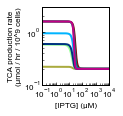

In [15]:
## PREDICTIONS USING PTac data rather than PPhlF data

strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

tfs_means_iptg_test2= build_transfer_functions([iptg_plot_conc], # x data
                                [AJT269_means_RPU_store.tolist()], # y data
                                ['AJT269'], kind = 'activator') # name, kind

tfs_means_rpu_test2 = dict()
tfs_means_tca_test2 = dict()

rows = 1
cols = 1

fig3_NEW, ax3_NEW = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

xvals_iptg = np.logspace(np.log10(0.1),np.log10(10000), 1000) # x values for creating smooth line

strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

for s in strains_subset:

    # set figure position within subplot
    FP = ax3_NEW

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    
    tfs_means_rpu_test2[s] = build_transfer_functions([tfs_means_iptg_test2[0].outputs], # x data
                            [means_RPU_repressors[s].tolist()], # y data
                            [s], kind = 'repressor') # name, kind

#     tfs_means_tca_test2[s] = build_transfer_functions([tfs_means_rnap_test2[0].outputs], # x data
#                             [TCA_rate_means_all[s].tolist()], # y data
#                             [s], kind = 'activator') # name, kind

#     FP.plot(xvals_iptg, tfs_means_RNAP['AJT462'][0].hill_eqn_act(tfs_means_rnap_test2[s][0].hill_eqn_rep(tfs_means_iptg_test2[0].hill_eqn_act(xvals_iptg))),
    FP.plot(xvals_iptg, ftca(tfs_means_rpu_test2[s][0].hill_eqn_rep(fptac(xvals_iptg))),
              color = strain_info_rep[s]['color'],
              zorder = 0, linewidth = 2)
    
    FP.set_xscale('log')
    FP.set_yscale('log')
    
    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)
    
    FP.set_xlim(0.1, 10000)
    FP.set_ylim(0.1,3)
    
    FP.grid(False)
    
    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())   
    
    ## set y ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')




{}

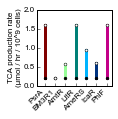

In [16]:
## PPhlF RNAP/s x TCA production rate transfer function

## looked best when allowed ymax to float between ymax measured and ymax * 5
## note that n is likely super high (upper limit was 20)

rows = 1
cols = 1

fig3_NEW2, ax3_NEW2 = plt.subplots(rows,cols, figsize=(1.8*cols,1.63*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

min_max = dict()
xticklabels = []

strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

for s in strains_subset:

    # set figure position within subplot
    FP = ax3_NEW2

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:

    min_max[s] = [np.min(ftca(tfs_means_rpu_test2[s][0].hill_eqn_rep(fptac(1000)))),
#                   np.max(ftca(tfs_means_rnap_test2[s][0].hill_eqn_rep(fptac(xvals_iptg))))]
                  np.max(ftca(tfs_means_rpu_test2[s][0].hill_eqn_rep(fptac(0))))]

    FP.scatter(strains_subset.index(s), min_max[s][0], 
               color = 'black', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
    FP.scatter(strains_subset.index(s), min_max[s][1], 
               color = 'white', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
    FP.plot([strains_subset.index(s), strains_subset.index(s)], min_max[s],
                              color = strain_info_rep[s]['color'],
                              zorder = 0, linewidth = 3)

#     FP.set_yscale('log')
    FP.set_yscale('linear')

    FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:

    FP.set_xticks(np.arange(len(strains_subset)))
    
    for s in strains_subset:
        xticklabels.append(strain_info_rep[s]['repressor'])
        
    if len(xticklabels) == len(strains_subset):
        FP.set_xticklabels(xticklabels, size = 8, rotation = 45, ha='right')

#     FP.set_ylim(0.001,0.5)
    FP.set_ylim(0,2)
    FP.set_xlim(-0.75, 6.5)
    
    FP.set_yticks([0,0.5,1.0,1.5,2.0])

#         if fig_pos[s]['fig_col'] == 0:
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

#     ## set x ticks
#     x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
#     FP.xaxis.set_major_locator(x_major)
#     x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.xaxis.set_minor_locator(x_minor)
#     FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#     ## set y ticks
#     y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
#     FP.yaxis.set_major_locator(y_major)
#     y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.yaxis.set_minor_locator(y_minor)
#     FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [63]:
# fig3_NEW2.savefig('Fig3G_NOTgates_TCArate_Predictions.pdf', bbox_inches = "tight", transparent = True)


In [17]:
display(min_max)

{'AJT303': [0.20256554447534736, 1.5980224857407415],
 'AJT305': [0.20000002472257342, 0.2195090831081485],
 'AJT306': [0.20003718284727245, 0.5788876304048971],
 'AJT308': [0.20048543864603902, 1.5982648081009605],
 'AJT309': [0.20002827658501401, 0.9516587155927356],
 'AJT310': [0.2000073518382451, 0.5951526971621874],
 'AJT312': [0.20000152098493182, 1.5958695180480733]}

In [19]:
pd.DataFrame.from_dict(min_max).T

,0,1
AJT303,0.202566,1.598022
AJT305,0.200000,0.219509
AJT306,0.200037,0.578888
AJT308,0.200485,1.598265
AJT309,0.200028,0.951659
AJT310,0.200007,0.595153
AJT312,0.200002,1.595870


In [19]:
# TCA conversion data (TCA concentration obtained from OD290 measurements and standard curve)
% store -r TCA_data_TF_r1 # 2021-01-12
% store -r TCA_data_TF_r2 # 2021-01-13
% store -r TCA_data_TF_r3 # 2021-01-14

# TCA production rate data (multiply slope of TCA conversion by 60 and divide by OD600)
% store -r TCA_rates_TF_r1_new # 2021-01-12
% store -r TCA_rates_TF_r2_new # 2021-01-13
% store -r TCA_rates_TF_r3_new # 2021-01-14

no stored variable # 2021-01-12
no stored variable # 2021-01-13
no stored variable # 2021-01-14
no stored variable # 2021-01-12
no stored variable # 2021-01-13
no stored variable # 2021-01-14


In [20]:
strains = ['AJT462', 'AJT463', 'AJT437'] 
media = ['M9'] 
iptg_conc = [0, 5, 15, 25, 40, 70, 200, 1000] 
iptg_plot_conc = [0.0001, 5, 15, 25, 40, 70, 200, 1000] 
time = [0, 30, 60, 90, 120]
reps = ['r1','r2','r3']

In [21]:
inducers = ['iptg']

inducer_info = {'iptg': {'conc': iptg_conc}}#,
#                'ohc14': {'conc': ohc14}}

# promoters = ['P$_\mathrm{Tac}$','P$_\mathrm{Cin}$', 'P$_\mathrm{PhlF}$',
#              'P$_\mathrm{LitR}$','P$_\mathrm{PsrA}$']

fig_pos = {'AJT462': {'fig_row': 0,'fig_col':0},
           'AJT463': {'fig_row': 0,'fig_col':1},
           'AJT437': {'fig_row': 0,'fig_col':2},
           'AJT437-+': {'fig_row': 0,'fig_col':3}}

strain_info = {'AJT462': {'color': '#FAAF3B',
                         'promoter': 'P$_\mathrm{Tac}$', #$_\mathrm{}$ allows for subscript without italics
                         'inducer':'iptg',
                          'design':'D1'},
               'AJT463': {'color': '#7BC129',
                         'promoter': 'P$_\mathrm{PhlF}$', #$_\mathrm{}$ allows for subscript without italics
                         'inducer':'iptg',
                          'design':'D1'},
                          
               'AJT437': {'color': '#FAAF3B',
                                   'promoter': 'P$_\mathrm{Tac}$', #$_\mathrm{}$ allows for subscript without italics
                                    'inducer':'iptg',
                                    'design':'PKU2.0'},
               'AJT437-+': {'color': '#FAAF3B',
                                   'promoter': 'P$_\mathrm{Tac}$', #$_\mathrm{}$ allows for subscript without italics
                                    'inducer':'iptg',
                                    'design':'PKU2.0'}}

rep_info = {'r1': {'marker': 'o',
                   'facecolor': 'white',
                   'edgecolor': 'black',
                   'linecolor': 'black'},
            'r2': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'grey',
                   'linecolor': 'grey'},
            'r3': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'darkgrey',
                    'linecolor': 'darkgrey'}}


In [22]:
TCA_data_TF_r1['AJT462']['M9']['iptg'][1000].loc[:,'TCA (mM)']

0      0.0166805
30     0.0697335
60      0.162817
90      0.248185
120     0.341268
Name: TCA (mM), dtype: object

In [23]:
TCA_data = dict()
TCA_rate = dict()

for s in strains:
    TCA_data[s] = dict()
    TCA_rate[s] = dict()
    for c in iptg_conc:
        TCA_data[s][c] = dict()
        TCA_rate[s][c] = dict()
        for r in reps:
            if r == 'r1':
                TCA_data[s][c][r] = TCA_data_TF_r1[s]['M9']['iptg'][c].loc[:,'TCA (mM)']
                TCA_rate[s][c][r] = TCA_rates_TF_r1_new[s]['M9']['iptg'][c]
            if r == 'r2':
                TCA_data[s][c][r] = TCA_data_TF_r2[s]['M9']['iptg'][c].loc[:,'TCA (mM)']
                TCA_rate[s][c][r] = TCA_rates_TF_r2_new[s]['M9']['iptg'][c]
            if r == 'r3':
                TCA_data[s][c][r] = TCA_data_TF_r3[s]['M9']['iptg'][c].loc[:,'TCA (mM)']
                TCA_rate[s][c][r] = TCA_rates_TF_r3_new[s]['M9']['iptg'][c]


In [24]:
# concatenate data into dataframes with all replicates in it for easy calculation of means and stdev

TCA_data_r123 = dict()
TCA_rate_r123 = dict()

TCA_data_means = dict()
TCA_rate_means = dict()

for s in strains:
    TCA_data_r123[s] = dict()
    TCA_rate_r123[s] = dict()
    
    TCA_data_means[s] = dict()
    TCA_rate_means[s] = dict()
    
    for c in iptg_conc:
        
        # needed to reset index because not all data had same and concatenation got funky
        # ignore_index does not work in pd.concat because that just ignores the index as a concatenation filter, 
        # doesn't actually allow concatenation of mismatching indeces
        TCA_data_r123[s][c] = pd.concat([TCA_data[s][c]['r1'].reset_index(drop=True),
                                         TCA_data[s][c]['r2'].reset_index(drop=True), 
                                         TCA_data[s][c]['r3'].reset_index(drop=True)], 
                                        keys = reps, axis = 1)
        TCA_rate_r123[s][c] = pd.concat([TCA_rate[s][c]['r1'].reset_index(drop=True),
                                         TCA_rate[s][c]['r2'].reset_index(drop=True),
                                         TCA_rate[s][c]['r3'].reset_index(drop=True)],
                                        keys = reps, axis = 1)
        
        TCA_data_means[s][c] = dict()
        TCA_rate_means[s][c] = dict()
        
        TCA_data_means[s][c]['means'] = TCA_data_r123[s][c].mean(axis=1)
        TCA_data_means[s][c]['stdevs'] = TCA_data_r123[s][c].std(axis=1)
        
        TCA_rate_means[s][c]['means'] = TCA_rate_r123[s][c].mean(axis=1)
        TCA_rate_means[s][c]['stdevs'] = TCA_rate_r123[s][c].std(axis=1)

In [25]:
TCA_data_means['AJT462'][200]['means']

0    0.014591
1    0.059284
2    0.137738
3    0.225356
4    0.309437
dtype: float64

In [10]:
TCA_rate_means['AJT462'][1000]['means']

0    0.078622
dtype: float64

In [11]:
TCA_rate_r123['AJT462'][1000]

,r1,r2,r3
0,0.075929,0.079243,0.080694


In [12]:
TCA_rate['AJT462'][1000]['r3']

15    0.080694
Name: od600, dtype: float64

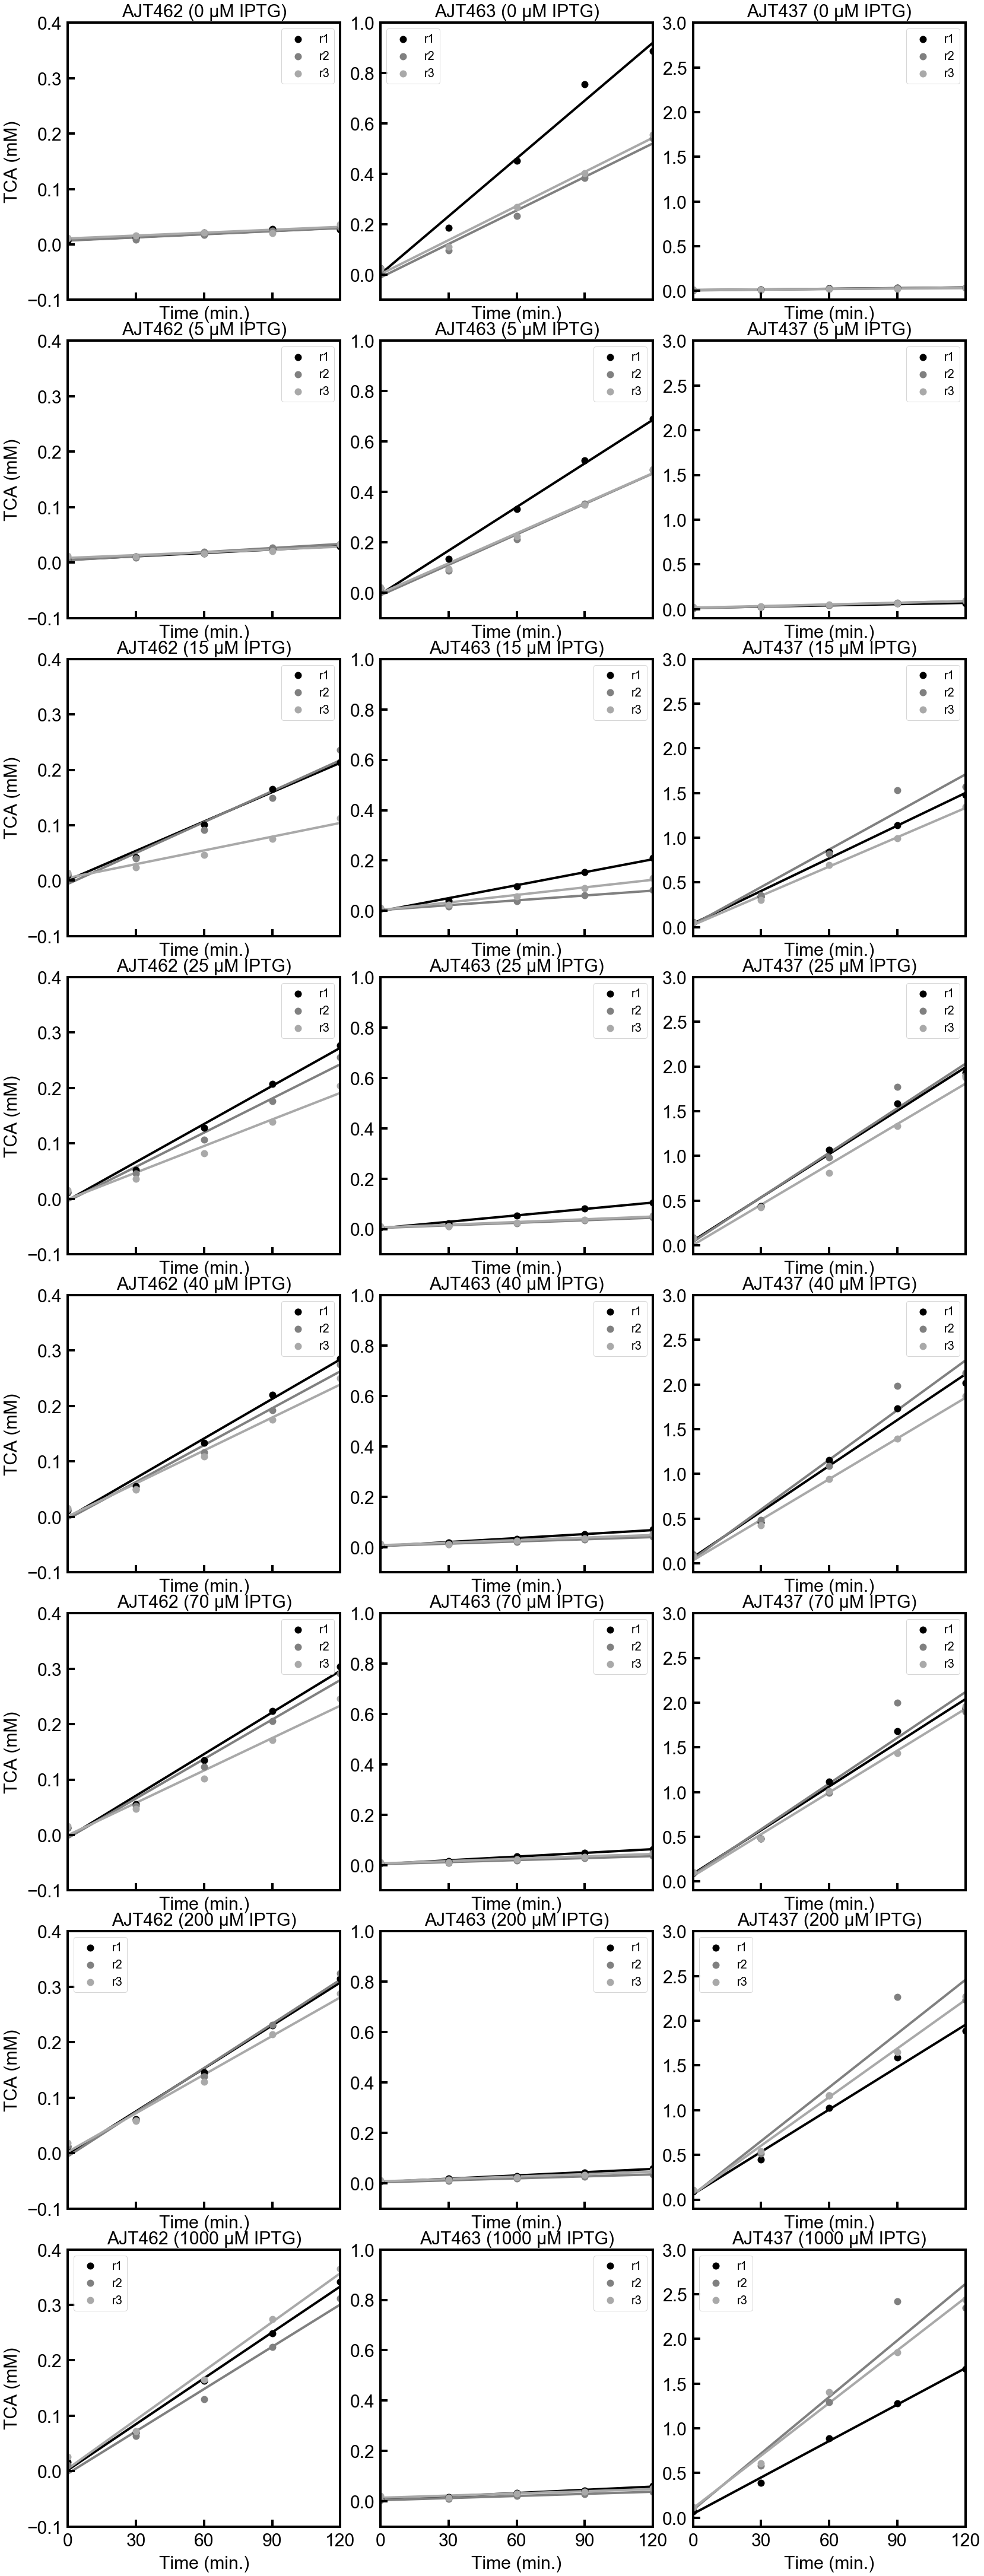

In [26]:
rows = 8
cols = 3

fig, ax = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:
        results[s][c] = dict()
        for r in reps:

            # set figure position within subplot
            FP = ax[iptg_conc.index(c)][strains.index(s)]

            # make plot borders black and specified thickness
            for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)

            # calculate slope of best-fit line through the points
            results[s][c][r] = linregress(time, TCA_data[s][c][r].astype(float))

            # plot data
            FP.scatter(time, TCA_data[s][c][r], color = rep_info[r]['edgecolor'], zorder = 1,
               edgecolors = rep_info[r]['edgecolor'], linewidths = 2, marker = rep_info[r]['marker'], s = 100,
                      label = '{}'.format(r))

            # plot best-fit line
            y_fit = results[s][c][r].intercept + results[s][c][r].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
            FP.plot(time, y_fit, color = rep_info[r]['linecolor'], zorder=0,
                    linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


            FP.grid(False)
            FP.set_title('{} ({} \u03BCM IPTG)'.format(s,c), size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
            FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)

            if s == 'AJT437':
                FP.set_ylim(-0.1,3)
            if s == 'AJT462':
                FP.set_ylim(-0.1,0.4)
            if s == 'AJT463':
                FP.set_ylim(-0.1,1)
                
            FP.set_xlim(0,120)

            if strains.index(s) == 0:
                FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

            FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
            FP.set_xticks(time)
    #         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

            FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [14]:
# fig.savefig('AJT462_463_TCAconversion_Time_x_TCA_EachReplicate.pdf', bbox_inches = "tight", transparent = True)

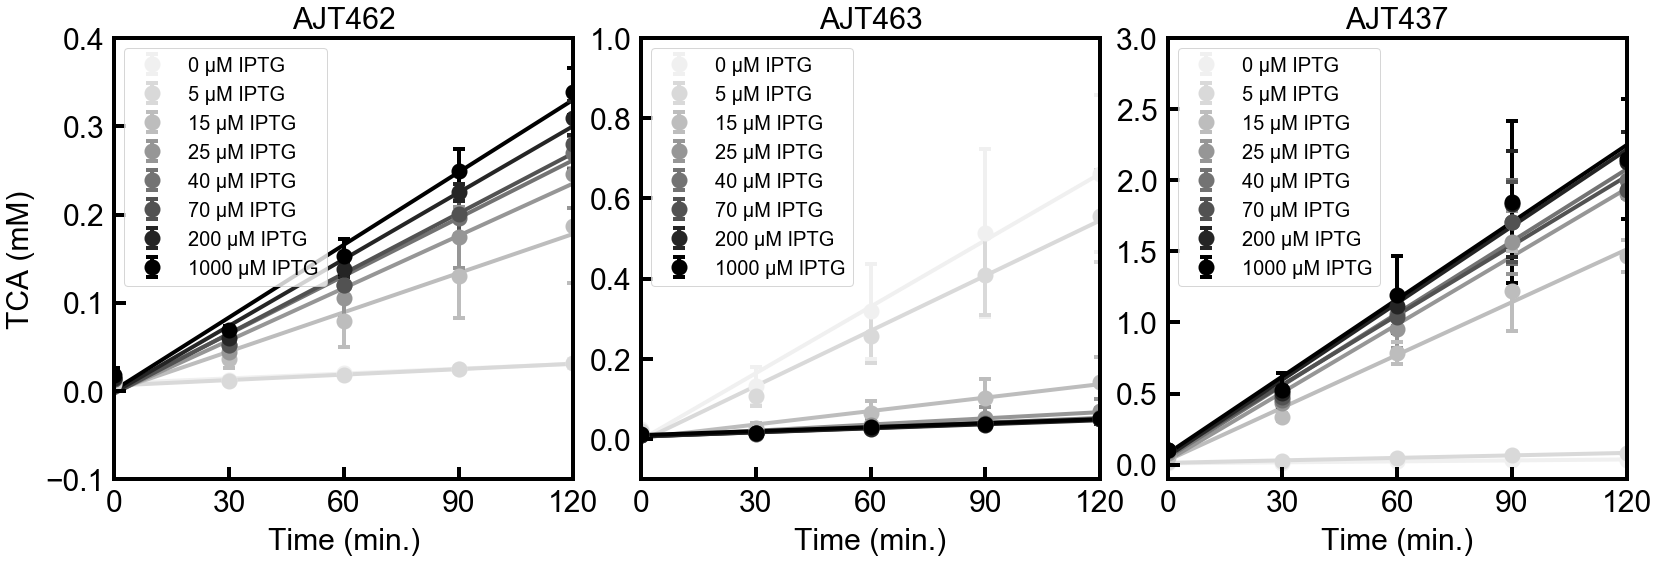

In [27]:
grays = ['#f0f0f0','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000']

rows = 1
cols = 3

fig_means, ax_means = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax_means[strains.index(s)]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(4)

        # calculate slope of best-fit line through the points
        results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

        # plot data
        FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
                    mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], 
                    mew = 4, marker = 'o', ms = 12, linewidth = 0,
                    ecolor = grays[iptg_conc.index(c)], elinewidth = 4, capsize = 6, capthick = 4,
                    label = '{} \u03BCM IPTG'.format(c))

        # plot best-fit line
        y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
        FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
                linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


        FP.grid(False)
        FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)

        if s == 'AJT437':
                FP.set_ylim(-0.1,3)
        if s == 'AJT462':
            FP.set_ylim(-0.1,0.4)
        if s == 'AJT463':
            FP.set_ylim(-0.1,1)
                
        FP.set_xlim(0,120)

        if strains.index(s) == 0:
            FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

        FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
        FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

        FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [16]:
# fig_means.savefig('AJT462_463_TCAconversion_Time_x_TCA_ErrorBars.pdf', bbox_inches = "tight", transparent = True)

In [17]:
## Function to adjust figure size to make actual axes certain size
# from https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

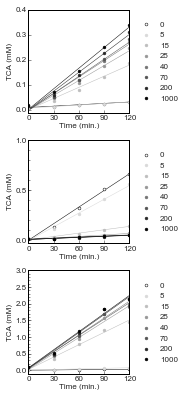

In [480]:
# from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# rows = 3
# cols = 1

# fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols,1.5*rows), sharey = 'row', constrained_layout = True)
# # plt.tight_layout(h_pad = 0) #tidies up spacing between plots

# results = dict()

# for s in strains:
#     results[s] = dict()
#     for c in iptg_conc:

#         # set figure position within subplot
#         FP = ax_means2[strains.index(s)]
# #         FP.set_aspect('equal', adjustable = 'box') 

#         # make plot borders black and specified thickness
#         for spine in FP.spines.values():
#             spine.set_edgecolor('black')
#             spine.set_linewidth(1)

#         # calculate slope of best-fit line through the points
#         results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

#         if c == 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))
            
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = 'black', zorder=0,
#                 linewidth = 0.5)
            
        
#         # plot data
#         if c != 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

#             # plot best-fit line
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
#                     linewidth = 0.5)

# #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
# #            marker = 'o', ms = 10, linewidth = 4,
# #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


#         FP.grid(False)
# #         FP.set_title(s, size = 30, pad = 10)
# #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
#         FP.set_xlabel('Time (min.)', size = 8, labelpad = 2)

#         if s == 'AJT437':
#             FP.set_ylim(-0.1,3)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
#         if s == 'AJT462':
#             FP.set_ylim(-0.013,0.4)
#             FP.yaxis.set_major_locator(MultipleLocator(0.1))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         if s == 'AJT463':
#             FP.set_ylim(-0.033,1)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
            
#         FP.set_xlim(0,120)

# #         if strains.index(s) == 0:
#         FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)
    
# #         FP.yaxis.set_major_locator(MultipleLocator(0.5))
# #         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# #         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

#         FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#         FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#         FP.legend(markerscale = 1, fontsize = 7, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon = False)
        
# #         set_size(2,2)
# # plt.show()




from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

rows = 3
cols = 1

fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols,1.8*rows), sharey = 'row', constrained_layout = True)
# plt.tight_layout(h_pad = 0) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax_means2[strains.index(s)]
#         FP.set_aspect('equal', adjustable = 'box') 

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        # calculate slope of best-fit line through the points
        results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

        if c == 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))
            
            FP.scatter(time, TCA_data_means[s][c]['means'], 
                    color = 'white', zorder = 1, edgecolors = 'black', linewidths = 0.5,
                    marker = 'o', s = 8,
                    label = '{}'.format(c))
            
            y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
            FP.plot(time, y_fit, color = 'black', zorder=0,
                linewidth = 0.5)
            
        
        # plot data
        if c != 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))
            
            FP.scatter(time, TCA_data_means[s][c]['means'], 
                    color = grays[iptg_conc.index(c)], zorder = 1, 
                    edgecolors = grays[iptg_conc.index(c)], linewidths = 0.5,
                    marker = 'o', s = 8,
                    label = '{}'.format(c))

            # plot best-fit line
            y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
            FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
                    linewidth = 0.5)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


        FP.grid(False)
#         FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Time (min.)', size = 8, labelpad = 2)

        if s == 'AJT437':
            FP.set_ylim(-0.1,3)
            FP.yaxis.set_major_locator(MultipleLocator(0.5))
            FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            FP.yaxis.set_minor_locator(MultipleLocator(0.1))
        if s == 'AJT462':
            FP.set_ylim(-0.013,0.4)
            FP.yaxis.set_major_locator(MultipleLocator(0.1))
            FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        if s == 'AJT463':
            FP.set_ylim(-0.033,1)
            FP.yaxis.set_major_locator(MultipleLocator(0.5))
            FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            FP.yaxis.set_minor_locator(MultipleLocator(0.1))
            
        FP.set_xlim(0,120)

#         if strains.index(s) == 0:
        FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)
    
#         FP.yaxis.set_major_locator(MultipleLocator(0.5))
#         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

        FP.legend(markerscale = 1, fontsize = 8, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0., frameon = False)
        
#         set_size(2,2)
# plt.show()



In [481]:
# fig_means2.savefig('AJT462_463_437_TCAconversion_Time_x_TCA_ErrorBars_black.pdf', bbox_inches = "tight", transparent = True)

# fig_means2.savefig('AJT462_463_437_TCAconversion_Time_x_TCA_NoErrorBars_black_larger.pdf', bbox_inches = "tight", transparent = True)


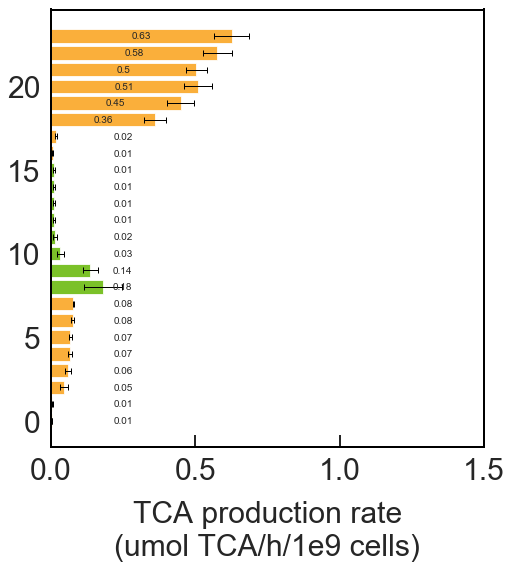

In [20]:
rows = 1
cols = 1

fig2,ax2 = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows), sharey = 'row',sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

# labels = []

for s in strains:
    for c in iptg_conc:
        # set figure position within subplot
        FP = ax2

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(2)

        y_pos = strains.index(s)*8 + iptg_conc.index(c)
        height = TCA_rate_means[s][c]['means']
#                 labels.append('{} ({} mM IPTG)'.format(s,i))
        colors = strain_info[s]['color']

        FP.barh(y_pos, height, color = colors, xerr = TCA_rate_means[s][c]['stdevs'],
                   error_kw = {'ecolor':'black', 'elinewidth': 1, 'capsize': 3, 'capthick': 1})
    
        FP.grid(False)

#                 FP.set_title('{} culture volume'.format(m), size = 30)
        FP.set_xlabel('TCA production rate\n(umol TCA/h/1e9 cells)', size = 30, labelpad = 15)
        # FP.set_ylabel('Strain', size = 30)

        FP.set_xlim(0,1.5)

        FP.tick_params(labelsize = 30, length = 12, width = 2, direction = 'in', pad = 10)
        FP.tick_params(axis='y',labelsize = 30, length = 0, width = 0, direction = 'in', pad = 10)

#                     FP.set_yticks(range(len(strains)*2-1))
#                     FP.set_yticklabels(['AJT462 -IPTG','AJT462 +IPTG','AJT463 -IPTG',
#                                         'AJT463 +IPTG','AJT467 -IPTG','AJT467 +IPTG',
#                                         'AJT470 -IPTG','AJT470 +IPTG'])

        if height.iloc[0]/2 > 0.1:
            FP.text(height/2, y_pos, '{}'.format(round(height.iloc[0],2)), size = 10, verticalalignment = 'center',horizontalalignment = 'center')
        else:
            FP.text(0.25, y_pos, '{}'.format(round(height.iloc[0],2)), size = 10, verticalalignment = 'center',horizontalalignment = 'center')


In [21]:
# fig2.savefig('AJT462_463_TCAproduction_rate_barplot_EachReplicate.pdf', bbox_inches = "tight", transparent = True)


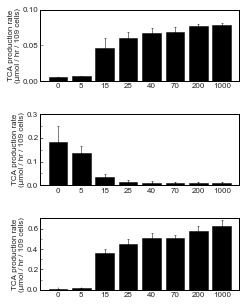

In [22]:
rows = 3
cols = 1

fig2_means2,ax2_means2 = plt.subplots(rows,cols, figsize=(3.5*cols,1.5*rows), sharey = 'row')
plt.tight_layout() #tidies up spacing between plots

# labels = []

for s in strains:
    for c in iptg_conc:
        # set figure position within subplot
        FP = ax2_means2[strains.index(s)]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        y_pos = iptg_conc.index(c)
        height = TCA_rate_means[s][c]['means']
#                 labels.append('{} ({} mM IPTG)'.format(s,i))
        colors = 'black'

        if c == 0:
            FP.bar(y_pos, height, yerr = TCA_rate_means[s][c]['stdevs'], 
                    color = colors, edgecolor = colors, linewidth = 0.5,
                   error_kw = {'ecolor': 'black', 'elinewidth': 0.5, 'capsize': 1, 'capthick' :0.5})
        else:
            FP.bar(y_pos, height, yerr = TCA_rate_means[s][c]['stdevs'], 
                    color = colors, edgecolor = colors, linewidth = 0.5,
                   error_kw = {'ecolor': 'black', 'elinewidth': 0.5, 'capsize': 1, 'capthick' :0.5})

        FP.grid(False)

#                 FP.set_title('{} culture volume'.format(m), size = 30)
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 109 cells)', size = 8, labelpad = 2)
        # FP.set_ylabel('Strain', size = 30)

        FP.set_xlim(-0.75,7.75)
        
        if s == 'AJT462':
            FP.set_ylim(0, 0.1)
            y_major = matplotlib.ticker.MultipleLocator(base = 0.05)
            FP.yaxis.set_major_locator(y_major)
#             y_minor = matplotlib.ticker.MultipleLocator(base = 0.05)
#             FP.yaxis.set_minor_locator(y_minor)
        if s == 'AJT463':
            FP.set_ylim(0,0.3)
            y_major = matplotlib.ticker.MultipleLocator(base = 0.1)
            FP.yaxis.set_major_locator(y_major)
            y_minor = matplotlib.ticker.MultipleLocator(base = 0.05)
            FP.yaxis.set_minor_locator(y_minor)
        if s == 'AJT437':
            FP.set_ylim(0,0.7)
            y_major = matplotlib.ticker.MultipleLocator(base = 0.2)
            FP.yaxis.set_major_locator(y_major)
            y_minor = matplotlib.ticker.MultipleLocator(base = 0.1)
            FP.yaxis.set_minor_locator(y_minor)

#         y_major = matplotlib.ticker.MultipleLocator(base = 0.5)
#         FP.yaxis.set_major_locator(y_major)
#         y_minor = matplotlib.ticker.MultipleLocator(base = 0.1)
#         FP.yaxis.set_minor_locator(y_minor)
#         FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

        FP.set_xticks(np.arange(8))
        FP.set_xticklabels(iptg_conc)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.tick_params(which = 'minor', length = 2, width = 0.5, direction = 'in', pad = 2)
#         FP.tick_params(axis='y',labelsize = 7, length = 2, width = 0, direction = 'in', pad = 2)

#         FP.set_yticks(range(len(strains)))
#         FP.set_yticklabels(['P$_\mathrm{Tac}$ -IPTG','P$_\mathrm{Tac}$ +IPTG',
#                             'P$_\mathrm{PhlF}$ -IPTG','P$_\mathrm{PhlF}$ +IPTG'])

#         FP.text(height+0.06, y_pos, '{}'.format(round(height.iloc[0],2)), size = 30, verticalalignment = 'center',horizontalalignment = 'left')
            
#             if height.iloc[0]/2 > 0.1:
#                 FP.text(height/2, y_pos, '{}'.format(round(height.iloc[0],2)), size = 30, verticalalignment = 'center',horizontalalignment = 'center')
#             else:
#                 FP.text(0.1, y_pos, '{}'.format(round(height.iloc[0],2)), size = 30, verticalalignment = 'center',horizontalalignment = 'center')
                        

In [23]:
# fig2_means2.savefig('AJT462_463_TCAproduction_rate_barplot_ErrorBars_black.pdf', bbox_inches = "tight", transparent = True)


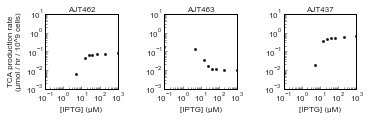

In [24]:
## IPTG x TCA production rate transfer function
rows = 1
cols = 3

fig3, ax3 = plt.subplots(rows,cols, figsize=(1.75*cols, 1.9*rows),sharex = 'col')
plt.tight_layout(pad = 2, h_pad = 2, w_pad = 2) #tidies up spacing between plots

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

    #                 ## transfer functions
    #                 tfs_means_au[s] = build_transfer_functions([inducer_info['plot_conc']], # x data
    #                                         [means['au'][s].tolist()], # y data
    #                                         [s]) # name

        # plot data
        if c == 0:
            FP.scatter(0.1, TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
               edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

        else:
            FP.scatter(c, TCA_rate_means[s][c]['means'], color = 'black',
               linewidths = 0.5, marker = 'o', s = 5)


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
        FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)

        FP.set_ylim(0.001,10)
        FP.set_xlim(0.1, 1000)

        if fig_pos[s]['fig_col'] == 0:
            FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [119]:
% store -r AJT269_means_RNAP_store
% store -r AJT269_stdevs_RNAP_store

AJT269_stdevs_RNAP_store

0.0       0.000289
5.0       0.000323
15.0      0.000379
25.0      0.001923
40.0      0.009140
70.0      0.001060
200.0     0.011448
1000.0    0.011064
dtype: float64

In [26]:
TCA_rate_means_temp = dict()
TCA_rate_stdevs_temp = dict()

TCA_rate_means_all = dict()
TCA_rate_stdevs_all = dict()

for s in strains:
    TCA_rate_means_temp[s] = dict()
    TCA_rate_stdevs_temp[s] = dict()
    for c in iptg_conc:
        TCA_rate_means_temp[s][c] = TCA_rate_means[s][c]['means'].values[0]
        TCA_rate_stdevs_temp[s][c] = TCA_rate_means[s][c]['stdevs'].values[0]
    TCA_rate_means_all[s] = pd.Series(TCA_rate_means_temp[s])
    TCA_rate_stdevs_all[s] = pd.Series(TCA_rate_stdevs_temp[s])


In [27]:
TCA_rate_means_all['AJT462'].tolist()

[0.0056869133541948,
 0.006533731625141081,
 0.04607859360351793,
 0.06014824748957634,
 0.06646955868612324,
 0.0685956160859726,
 0.07627028766901993,
 0.0786217471796591]

In [28]:
from scipy.optimize import curve_fit

### different functions to model the growth curve ########################
def Sensor(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (x**n)/((x**n) + (kd**n))


def NOTgate(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (kd**n)/((x**n) + (kd**n))
##########################################################################

TCA_rate_means_min = dict()
TCA_rate_means_max = dict()
results_means = dict()
pcov_means = dict()
fit_params_means = dict()

for s in strains:
    results_means[s] = dict()
    pcov_means[s] = dict()
    fit_params_means[s] = dict()
    
    
    TCA_rate_means_min[s] = TCA_rate_means_all[s].min()
    TCA_rate_means_max[s] = TCA_rate_means_all[s].max()
    
    initial_guesses = [TCA_rate_means_min[s], TCA_rate_means_max[s], 0.5, 2] # guesses that work well in Jai's function
    
    # curve fit the test data
    if s in ['AJT462','AJT437']:
        results_means[s], pcov_means[s] = curve_fit(Sensor, AJT269_means_RNAP_store, TCA_rate_means_all[s], initial_guesses)
        
    elif s == 'AJT463':
        results_means[s], pcov_means[s] = curve_fit(NOTgate, AJT269_means_RNAP_store, TCA_rate_means_all[s], initial_guesses)

    # results is a list containing fitted parameter [ymin, ymax, kd, n] 
    fit_params_means[s] = {'ymin': results_means[s][0],
                        'ymax': results_means[s][1],
                        'kd': results_means[s][2],
                        'n': results_means[s][3], # results[s][r][1] = growth_rate

                        # get standard error
                        'std_err': np.sqrt(np.diag(pcov_means[s])) # array listing standard error of growth_rate, lag_time, and double_time
                       }    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars


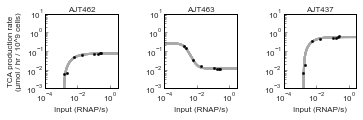

In [29]:
## IPTG x TCA production rate transfer function
rows = 1
cols = 3

fig3_RNAP, ax3_RNAP = plt.subplots(rows,cols, figsize=(1.75*cols, 1.9*rows),sharex = 'col')
plt.tight_layout(pad = 2, h_pad = 2, w_pad = 2) #tidies up spacing between plots

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3_RNAP[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

    #                 ## transfer functions
    #                 tfs_means_au[s] = build_transfer_functions([inducer_info['plot_conc']], # x data
    #                                         [means['au'][s].tolist()], # y data
    #                                         [s]) # name

        # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
        FP.scatter(AJT269_means_RNAP_store[c], TCA_rate_means[s][c]['means'], color = 'black',
           linewidths = 0.5, marker = 'o', s = 5, zorder = 1)


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        ## fitting line
        if s in ['AJT462','AJT437']:
            xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
            yvals = Sensor(xvals, *results_means[s])
        
        if s == 'AJT463':
            xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
            yvals = NOTgate(xvals, *results_means[s])
            
        FP.plot(xvals, yvals, color = 'darkgrey', zorder = 0, linewidth = 2)
    
        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
        FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)

        FP.set_ylim(0.001,10)
        FP.set_xlim(0.0001, 3)

        if fig_pos[s]['fig_col'] == 0:
            FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [30]:
max(TCA_rate_means_all[s].tolist())

0.6268694309542262

## Using modified transferfunction.py script (transferfunction_beta.py)
This should be able to do activator and repressor functions in same cell

In [31]:
from transferfunction_beta import *

In [32]:
[0] + AJT269_means_RNAP_store.tolist()

[0,
 0.0015650897149252936,
 0.002162011244100344,
 0.005767417288152744,
 0.017944616561674735,
 0.10860505897690831,
 0.17567516813773262,
 0.2340779650363116,
 0.26896205869985534]

/usr/local/lib/python3.6/site-packages/transferfunction_beta.py:103: RuntimeWarning: invalid value encountered in true_divide


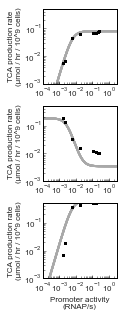

In [33]:
## IPTG x TCA production rate transfer function
rows = 3
cols = 1

fig3_RNAP_tf_beta, ax3_RNAP_tf_beta = plt.subplots(rows,cols, figsize=(1.69*cols,1.45*rows))
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3_RNAP_tf_beta[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        ## transfer functions
        if s in ['AJT462','AJT437']:
#             tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
#                                     [TCA_rate_means_all[s].tolist()], # y data
#                                     [s], kind = 'activator') # name, kind

             tfs_means_RNAP[s] = build_transfer_functions([[0]+AJT269_means_RNAP_store.tolist()], # x data
                                    [[0]+TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'activator') # name, kind
                                                          
        if s == 'AJT463':
            tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                    [TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'repressor') # name, kind

        # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
        FP.scatter(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, color = 'black',
           linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
    
#         ## errorbars
#         FP.errorbar(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, yerr = TCA_rate_stdevs_all[s],
#                                                 zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                                                 c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        ## fitting line
        xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
        
        if s in ['AJT462','AJT437']:
            FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn_act(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
        
        if s == 'AJT463':
            FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn_rep(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
    
        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        if s == 'AJT437':
            FP.set_xlabel('Promoter activity\n(RNAP/s)', size = 8, labelpad = 2)

        FP.set_ylim(0.001, 0.5)
        FP.set_xlim(0.0001, 3)

#         if fig_pos[s]['fig_col'] == 0:
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [34]:
# fig3_RNAP_tf_beta.savefig('AJT462_463_437_TFs_RNAPxTCArate_ErrorBars_Yadjusted.pdf', bbox_inches = "tight", transparent = True)


In [35]:
params = pd.DataFrame(np.array([[tfs_means_RNAP['AJT462'][0].ymax, tfs_means_RNAP['AJT462'][0].ymin, tfs_means_RNAP['AJT462'][0].kd, tfs_means_RNAP['AJT462'][0].n]]),
                     columns = ['ymax\n(TCA prod. rate)','ymin\n(TCA prod. rate)','Kd\n(RNAP/s)','n'])

params

,ymax (TCA prod. rate),ymin (TCA prod. rate),Kd (RNAP/s),n
0,0.078622,0.0,0.006,2.0


In [120]:
%store -r means_RNAP_AJT312
%store -r stdevs_RNAP_repressors

In [46]:
iptg_plot_conc

[0.0001, 5, 15, 25, 40, 70, 200, 1000]

In [468]:
def hill_eqn_act(x, ymax, ymin, k, n):
    return ymin + ((ymax-ymin) * x**n)/(x**n + k**n)

def hill_eqn_rep(x, ymax, ymin, k, n):
    return ymin + ((ymax-ymin) * k**n)/(x**n + k**n)

def fptac(x):
    ymin = 0.0016
    ymax = 0.27
    k = 53.66
    n = 3.32
    return hill_eqn_act(x, ymax, ymin, k, n)

def fphlf(x):
#     ymin = 0.0003
    ymin = 0.0006 #Chris asked for it to be 2-3 fold higher
    ymax = 0.86
    k = .01
    n =  2.16
    return hill_eqn_rep(x, ymax, ymin, k, n)

def ftca(x):
#     # PTac-TCA
#     ymin = .005687
#     ymax = 0.078622
#     k = .005497
#     n =  4.481792
    
    ### GOOD SET FOR OF PARAMETERS BEFORE NEEDED TO BE SPLIT IN HALF
#     # PTac-TCA to (0,0)
#     ymin = 0.0
#     ymax = 0.078622
#     k = 0.006
#     n = 2

## Worked well for second time with linear fit as second half
#     ymin = 0.0
#     ymin = 0.005687 # for when y-axis is in log but needs to look like 0
#     ymax = 0.078622
#     k = 0.006
#     n = 2


## for when Chris wanted to fit points better on log-log
    ymin = .005687
    ymax = 0.058622
    k = .005497
    n =  4.481792

#     
#     ymin = 0.0
#     ymax = 0.078622
#     k = 0.008
#     n = 1
    
    # PPhlF-TCA (sent to Jai)
#     ymin = 0.010267
#     ymax = 0.54599
#     k = 0.947988
#     n =  19.992404

    # PPhlF-TCA (CAV drawn plot)
#     ymin = 0.010267
#     ymax = 0.227496
#     k = 0.9
#     n = 3.0
    return hill_eqn_act(x, ymax, ymin, k, n)

def ftca_second(x):
    ymin = -0.02
    ymax = 0.0925
    k = 0.00575
    n = 0.5
#     # PTac-TCA to (0,0)
#     ymin = 0.0
#     ymax = 1
#     k = 0.001
#     n = 0.5
    return hill_eqn_act(x, ymax, ymin, k, n)

# transition = 0.008 # good for linear fit first time through
transition = 0.018 # works well for second time through linear fit

def ftca_linear(x):
    m = (0.09-ftca(transition))/(np.log10(3)-np.log10(transition))
    b = (0.09-m*np.log10(3))
#     print(m,b)
    return(m*np.log10(x) + b)


def sim_circuit(iptg_plot_conc):
    #TCA is output
    #phlf output = input for tca
    #ptac output = input for phlf
    
    ptac_out = fptac(iptg_plot_conc) #output in rnap/s
    phlf_out = fphlf(ptac_out)
    
    tca_out = ftca(phlf_out)
    return tca_out

def sim_circuit_second(iptg_plot_conc):
    ptac_out = fptac(iptg_plot_conc) #output in rnap/s
    phlf_out = fphlf(ptac_out)
    
    tca_out = ftca_second(phlf_out)
    return tca_out

def sim_circuit_linear(iptg_plot_conc):
    ptac_out = fptac(iptg_plot_conc) #output in rnap/s
    phlf_out = fphlf(ptac_out)
    
    tca_out = ftca_linear(phlf_out)
    return tca_out

In [202]:
# AJT269_means_RNAP_store.tolist()[2:]
TCA_rate_means_all['AJT462'].tolist()[2:]

[0.04607859360351793,
 0.06014824748957634,
 0.06646955868612324,
 0.0685956160859726,
 0.07627028766901993,
 0.0786217471796591]

In [376]:
def power_law(x, k, a):
    return k*x**a

initial_guesses = [1, 0.5] # k, a

power_results, power_cov = curve_fit(power_law, AJT269_means_RNAP_store.tolist()[2:],TCA_rate_means_all['AJT462'].tolist()[2:], initial_guesses)
power_results

poly_results = np.polyfit(AJT269_means_RNAP_store.tolist()[1:],TCA_rate_means_all['AJT462'].tolist()[1:], 3)
poly = np.poly1d(poly_results)


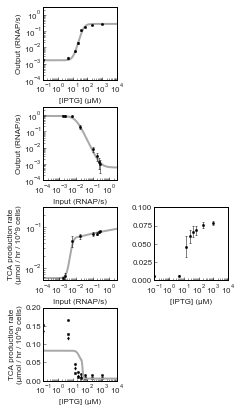

In [489]:
rows = 4
cols = 2

# fig00, ax00 = plt.subplots(rows,cols, figsize=(1.69*cols,1.45*rows)) # 1 column
fig00, ax00 = plt.subplots(rows,cols, figsize=(1.62*cols,1.45*rows)) # 2 column
plt.tight_layout(h_pad=0.5) #tidies up spacing between plots

strains00 = ['AJT269','AJT312','AJT462','AJT463']
iptg_plot_conc2 = [0.1]+iptg_plot_conc[1:]

for s in strains00:
    FP = ax00[strains00.index(s)][0]
    
    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
      
    FP.set_xscale('log')
    FP.set_yscale('log')
    FP.grid(False)
                   
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')    
    
    if s == 'AJT269':
        FP.scatter(iptg_plot_conc2, AJT269_means_RNAP_store, color = 'black',
               linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
        FP.errorbar(iptg_plot_conc2, AJT269_means_RNAP_store, yerr = AJT269_stdevs_RNAP_store,
                    zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)

        xvals = np.logspace(-1, 4, 1000)
        FP.plot(xvals, fptac(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

        FP.set_ylim(0.0001, 3)
        FP.set_xlim(0.1, 10000)

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    elif s == 'AJT312':
        FP.scatter(AJT269_means_RNAP_store, means_RNAP_AJT312, color = 'black',
               linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
        FP.errorbar(AJT269_means_RNAP_store,means_RNAP_AJT312, yerr = stdevs_RNAP_repressors[s],
                    zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
        xvals = np.logspace(-4, 1, 1000)
        FP.plot(xvals, fphlf(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
        
        FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
        FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)
        
        FP.set_ylim(0.0001, 3)
        FP.set_xlim(0.0001, 3)
        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        
    elif s == 'AJT462':
        FP.scatter([[0]+AJT269_means_RNAP_store.tolist()],[[0]+TCA_rate_means_all[s].tolist()], color ='black',
                  linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
#         FP.scatter(means_RNAP_AJT312, ftca(means_RNAP_AJT312), color = 'black',
#                linewidths = 0.5, marker = 'o', s = 5, zorder = 1)

        FP.errorbar([0]+AJT269_means_RNAP_store.tolist(),[0]+TCA_rate_means_all[s].tolist(), yerr = [0.00001]+TCA_rate_stdevs_all[s].tolist(),
                    zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
        xvals = np.logspace(-4, np.log10(transition), 1000)
#         xvals = np.logspace(-4, np.log10(3), 1000)
#         FP.plot(xvals[0:len(xvals)/2], ftca(xvals[0:len(xvals)/2]), color = 'darkgrey', zorder = 0, linewidth = 2)
        FP.plot(xvals, ftca(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
    
    
        xvals = np.logspace(np.log10(transition), np.log10(3), 1000)
#         FP.plot(xvals[0:len(xvals)/2], ftca(xvals[0:len(xvals)/2]), color = 'darkgrey', zorder = 0, linewidth = 2)
#         FP.plot([transition, 3], [ftca(transition),0.095], color = 'darkgrey', zorder = 0, linewidth = 2)
        FP.plot(xvals, ftca_linear(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
    
    ### USED TO MAKE DOUBLE SIGMOID CURVE ###
#         xvals = np.logspace(np.log10(0.009), 100, 1000)
# #         FP.plot(xvals, power_law(xvals, *power_results), color = 'darkgrey', zorder = 0, linewidth = 2)
#         FP.plot(xvals, ftca_second(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
# #         FP.plot(xvals, poly(xvals), color = 'cornflowerblue', zorder = 0, linewidth = 2)

    ###-------END--------###

        FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        FP.set_yscale('log')
        
#         FP.set_ylim(0, 0.1)
        FP.set_ylim(0.005, 0.3)
        FP.set_xlim(0.0001, 3)   
        
#         FP.set_yticks([0,0.02,0.04,0.06,0.08,0.1])
                   
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        
        
        ######## second column
        FP2 = ax00[2][1]
        # make plot borders black and specified thickness
        for spine in FP2.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
        
        
        FP2.scatter([0]+iptg_plot_conc2[:],[[0]+TCA_rate_means_all[s].tolist()], color ='black',
                  linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
        FP2.errorbar([0]+iptg_plot_conc2[:],[0]+TCA_rate_means_all[s].tolist(), yerr = [0.00001]+TCA_rate_stdevs_all[s].tolist(),
                    zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
        xvals2 = np.logspace(-1, 4, 1000)
#         FP2.plot(xvals2, ftca(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)
    
        FP2.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
#         FP2.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        FP2.set_yscale('linear')
        FP2.set_xscale('log')
        
        FP2.grid(False)
        
#         FP2.set_ylim(0.005, 0.3)
        FP2.set_ylim(0, 0.1)
        FP2.set_xlim(0.1, 10000)
                 
        FP2.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP2.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')  
        
#         FP2.set_yticks([0,0.02,0.04,0.06,0.08,0.1])
        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP2.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP2.xaxis.set_minor_locator(x_minor)
        FP2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        
        
    elif s == 'AJT463':
        for c in iptg_conc:
            markers = ['o','s','d']
            for r in reps:
            
                FP.scatter(iptg_plot_conc2[iptg_conc.index(c)], TCA_rate_r123[s][c][r], color ='black',
                          linewidths = 0.5, marker = markers[reps.index(r)], s = 5, zorder = 0, label = r)
        #         FP.scatter(iptg_plot_conc2,TCA_rate_means_all[s], color ='black',
#                   linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
#         FP.scatter(means_RNAP_AJT312, ftca(means_RNAP_AJT312), color = 'black',
#                linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
#         FP.errorbar(iptg_plot_conc2,TCA_rate_means_all[s], yerr = TCA_rate_stdevs_all[s],
#                     zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                     c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
    
        xvals = np.logspace(-1, np.log10(38), 1000) ## 43.5 worked well for first time with linear plot as second half
        FP.plot(xvals, sim_circuit_linear(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
        
        xvals = np.logspace(np.log10(38),4,1000) ## 43.5 worked well for first time with linear plot as second half
        FP.plot(xvals, sim_circuit(xvals), color = 'darkgrey', zorder = 1, linewidth = 2)
    
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        FP.set_yscale('linear')
        
        FP.set_ylim(0, 0.2)
#         FP.set_ylim(0.005, 0.3)
        FP.set_xlim(0.1, 10000)
                        
        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        
fig00.delaxes(ax00[0][1])
fig00.delaxes(ax00[1][1])
fig00.delaxes(ax00[3][1])
                   
#     FP.set_xscale('log')
#     FP.set_yscale('log')
#     FP.grid(False)
                   
#     FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#     FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

In [490]:
# fig00.savefig('LinearCombination_EachPlot_Ymin_2foldhigher_linearY_2ndColumn_2FitsInOne_Linear2ndHalf.pdf', bbox_inches = "tight", transparent = True)
# fig00.savefig('LinearCombination_EachPlot_Ymin_2foldhigher_logY_2ndColumn_2FitsInOne_Linear2ndHalf.pdf', bbox_inches = "tight", transparent = True)


In [371]:
TCA_rate_means_all['AJT462']
display(AJT269_means_RNAP_store)

0.0       0.001565
5.0       0.002162
15.0      0.005767
25.0      0.017945
40.0      0.108605
70.0      0.175675
200.0     0.234078
1000.0    0.268962
dtype: float64

In [128]:
% store -r means_RNAP_repressors

In [129]:
means_RNAP_repressors['AJT306']

0.0       0.226296
5.0       0.216970
15.0      0.176145
25.0      0.045281
40.0      0.012276
70.0      0.007415
200.0     0.004855
1000.0    0.003858
dtype: float64

In [130]:
## NEW COLORS
# dictionary with strain information that can be copied from experiment to experiment

# PsrA = '#800000'
# HlyIIR = '#d2aa85'
# B3BM3R1 = '#ffea06'
# AmtR = '#aaab3f'
# LitR = '#98ff98'
# AmeR = '#008077'
# IcaR = '#003380'
# BetI = '#7a4d87'
# PhlF = '#c20088'

strain_info_rep = dict([
    ('AJT206', {'color': 'black',
                'repressor': 'none'}),
    ('AJT280',{'color': 'blackk',
               'repressor': 'RPU'}),
    ('AJT303',{'color': '#800000',
               'repressor': 'PsrA'}),
    ('AJT304',{'color': '#d2aa85',
               'repressor': 'HlyIIR'}),
    ('AJT305',{'color': '#aaab3f',
               'repressor': 'BM3R1'}),
    ('AJT306',{'color': '#98ff98',
               'repressor': 'AmtR'}),
#     ('AJT307',{'color': '#98ff98',
#                'repressor': 'QacR'}),
    ('AJT308',{'color': '#008077',
               'repressor': 'LitR'}),
    ('AJT309',{'color': '#00b4ff',
               'repressor': 'AmeRS'}),
    ('AJT310',{'color': '#003380',
               'repressor': 'IcaR'}),
    ('AJT311',{'color': '#7a4d87',
               'repressor': 'BetI'}),
    ('AJT312',{'color': '#c20088',
               'repressor': 'PhlF'}),
    ('AJT344', {'color': '#003380',
               'repressor': 'IcaR'}),
    ('AJT269',{'color': '#fbb03b',
               'repressor': '$P_{Tac}$'})
])

NameError: name 'tfs_means_phlf' is not defined

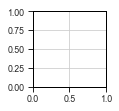

In [131]:
# ## PPhlF RNAP/s x TCA production rate transfer function

# ## looked best when allowed ymax to float between ymax measured and ymax * 5
# ## note that n is likely super high (upper limit was 20)

# rows = 1
# cols = 1

# fig3_phlf_NOTgates, ax3_phlf_NOTgates = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
# plt.tight_layout(h_pad=0) #tidies up spacing between plots

# min_max = dict()
# xticklabels = []

# strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

# for s in strains_subset:

#     # set figure position within subplot
#     FP = ax3_phlf_NOTgates

#     # make plot borders black and specified thickness
#     for spine in FP.spines.values():
#         spine.set_edgecolor('black')
#         spine.set_linewidth(1)

#     # plot data
# #         if c == 0:
# #             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
# #                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

# #         else:

#     min_max[s] = [np.min(means_RNAP_repressors[s]),np.max(means_RNAP_repressors[s][0])]

#     FP.scatter(strains_subset.index(s), tfs_means_phlf['AJT463'][0].hill_eqn_act(min_max[s][0]), 
#                color = 'black', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
#     FP.scatter(strains_subset.index(s), tfs_means_phlf['AJT463'][0].hill_eqn_act(min_max[s][1]), 
#                color = 'white', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
#     FP.plot([strains_subset.index(s), strains_subset.index(s)], tfs_means_phlf['AJT463'][0].hill_eqn_act(min_max[s]),
#                               color = strain_info_rep[s]['color'],
#                               zorder = 0, linewidth = 3)

#     FP.set_yscale('log')

#     FP.grid(False)
# #         FP.set_title(s, size = 8, pad = 2)
# #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:

#     FP.set_xticks(np.arange(len(strains_subset)))
    
#     for s in strains_subset:
#         xticklabels.append(strain_info_rep[s]['repressor'])
        
#     if len(xticklabels) == len(strains_subset):
#         FP.set_xticklabels(xticklabels, size = 8, rotation = 45)

#     FP.set_ylim(0.001,0.5)
#     FP.set_xlim(-0.75, 6.5)

# #         if fig_pos[s]['fig_col'] == 0:
#     FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

# #     ## set x ticks
# #     x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
# #     FP.xaxis.set_major_locator(x_major)
# #     x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
# #     FP.xaxis.set_minor_locator(x_minor)
# #     FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#     ## set y ticks
#     y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
#     FP.yaxis.set_major_locator(y_major)
#     y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.yaxis.set_minor_locator(y_minor)
#     FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
#     FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
# #                         FP.set_xticks(time)
#     FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#     #                 FP.legend(markerscale = 1, fontsize = 20)

# # fig.delaxes(ax[0][2])
# #         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [ ]:
# fig3_phlf_NOTgates.savefig('NOTgates_TCArate_Predictions_CAVdrawn_Yadjusted.pdf', bbox_inches = "tight", transparent = True)


In [ ]:
# Plot with theoretical predicted maximums and dynamic ranges for each of the repressors

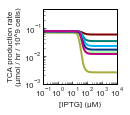

In [367]:
## PREDICTIONS USING PTac data rather than PPhlF data

strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

tfs_means_iptg_test2= build_transfer_functions([iptg_plot_conc], # x data
                                [AJT269_means_RNAP_store.tolist()], # y data
                                ['AJT269'], kind = 'activator') # name, kind

tfs_means_rnap_test2 = dict()
tfs_means_tca_test2 = dict()

rows = 1
cols = 1

fig3_NEW, ax3_NEW = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

xvals_iptg = np.logspace(np.log10(0.1),np.log10(10000), 1000) # x values for creating smooth line

strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

for s in strains_subset:

    # set figure position within subplot
    FP = ax3_NEW

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    
    tfs_means_rnap_test2[s] = build_transfer_functions([tfs_means_iptg_test2[0].outputs], # x data
                            [means_RNAP_repressors[s].tolist()], # y data
                            [s], kind = 'repressor') # name, kind

#     tfs_means_tca_test2[s] = build_transfer_functions([tfs_means_rnap_test2[0].outputs], # x data
#                             [TCA_rate_means_all[s].tolist()], # y data
#                             [s], kind = 'activator') # name, kind

#     FP.plot(xvals_iptg, tfs_means_RNAP['AJT462'][0].hill_eqn_act(tfs_means_rnap_test2[s][0].hill_eqn_rep(tfs_means_iptg_test2[0].hill_eqn_act(xvals_iptg))),
    FP.plot(xvals_iptg, ftca(tfs_means_rnap_test2[s][0].hill_eqn_rep(fptac(xvals_iptg))),
              color = strain_info_rep[s]['color'],
              zorder = 0, linewidth = 2)
    
    FP.set_xscale('log')
    FP.set_yscale('log')
    
    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)
    
    FP.set_xlim(0.1, 10000)
    FP.set_ylim(0.001,0.5)
    
    FP.grid(False)
    
    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())   
    
    ## set y ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')




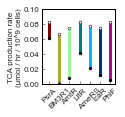

In [450]:
## PPhlF RNAP/s x TCA production rate transfer function

## looked best when allowed ymax to float between ymax measured and ymax * 5
## note that n is likely super high (upper limit was 20)

rows = 1
cols = 1

fig3_NEW2, ax3_NEW2 = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

min_max = dict()
xticklabels = []

strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

for s in strains_subset:

    # set figure position within subplot
    FP = ax3_NEW2

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:

    min_max[s] = [np.min(ftca(tfs_means_rnap_test2[s][0].hill_eqn_rep(fptac(1000)))),
#                   np.max(ftca(tfs_means_rnap_test2[s][0].hill_eqn_rep(fptac(xvals_iptg))))]
                  np.max(ftca_linear(tfs_means_rnap_test2[s][0].hill_eqn_rep(fptac(0))))]

    FP.scatter(strains_subset.index(s), min_max[s][0], 
               color = 'black', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
    FP.scatter(strains_subset.index(s), min_max[s][1], 
               color = 'white', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
    FP.plot([strains_subset.index(s), strains_subset.index(s)], min_max[s],
                              color = strain_info_rep[s]['color'],
                              zorder = 0, linewidth = 3)

#     FP.set_yscale('log')
    FP.set_yscale('linear')

    FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:

    FP.set_xticks(np.arange(len(strains_subset)))
    
    for s in strains_subset:
        xticklabels.append(strain_info_rep[s]['repressor'])
        
    if len(xticklabels) == len(strains_subset):
        FP.set_xticklabels(xticklabels, size = 8, rotation = 45)

#     FP.set_ylim(0.001,0.5)
    FP.set_ylim(0,0.1)
    FP.set_xlim(-0.75, 6.5)
    
    FP.set_yticks([0,0.02,0.04,0.06,0.08,0.1])

#         if fig_pos[s]['fig_col'] == 0:
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

#     ## set x ticks
#     x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
#     FP.xaxis.set_major_locator(x_major)
#     x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.xaxis.set_minor_locator(x_minor)
#     FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#     ## set y ticks
#     y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
#     FP.yaxis.set_major_locator(y_major)
#     y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.yaxis.set_minor_locator(y_minor)
#     FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [451]:
# fig3_NEW2.savefig('NOTgates_TCArate_Predictions_PTacParams_Ylinear_2FitsInOne_Linear2ndHalf.pdf', bbox_inches = "tight", transparent = True)

In [ ]:
## Predictions with PPHlF instead of PTac

In [29]:
def ftca_phlf(x):
#    PPhlF-TCA (CAV drawn plot)
    ymin = 0.010267
#     ymin = 0
    ymax = 0.227496
    k = 0.9
    n = 3.0
    return hill_eqn_act(x, ymax, ymin, k, n)


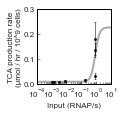

In [163]:
## PPhlF RNAP/s x TCA production rate transfer function

## looked best when allowed ymax to float between ymax measured and ymax * 5
## note that n is likely super high (upper limit was 20)

rows = 1
cols = 1

fig_phlf_tca, ax_phlf_tca = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

strains_subset = ['AJT312']

xvals = np.logspace(-4, 1, 1000)

for s in strains_subset:

    # set figure position within subplot
    FP = ax_phlf_tca

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    FP.scatter(means_RNAP_AJT312, TCA_rate_means_all['AJT463'], color ='black',
                  linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
    
    FP.errorbar(means_RNAP_AJT312, TCA_rate_means_all['AJT463'], yerr = TCA_rate_stdevs_all['AJT463'], 
                   zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
    
    FP.plot(xvals, ftca_phlf(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)

    FP.set_xscale('log')
    FP.set_yscale('linear')

    FP.grid(False)

#     FP.set_ylim(0.001,0.5)
    FP.set_ylim(0,0.3)
    FP.set_xlim(0.0001, 10)

    FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#     ## set y ticks
#     y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
#     FP.yaxis.set_major_locator(y_major)
#     y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.yaxis.set_minor_locator(y_minor)
#     FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    

In [164]:
# fig_phlf_tca.savefig('RNAPxTCA_PhlF_Ylinear.pdf', bbox_inches = "tight", transparent = True)

NameError: name 'tfs_means_rnap_test2' is not defined

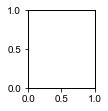

In [30]:
## PPhlF RNAP/s x TCA production rate transfer function

## looked best when allowed ymax to float between ymax measured and ymax * 5
## note that n is likely super high (upper limit was 20)

rows = 1
cols = 1

fig3_NEW3, ax3_NEW3 = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

min_max = dict()
xticklabels = []

strains_subset = ['AJT303','AJT305','AJT306','AJT308','AJT309','AJT310','AJT312']

for s in strains_subset:

    # set figure position within subplot
    FP = ax3_NEW3

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:

    min_max[s] = [np.min(ftca_phlf(tfs_means_rnap_test2[s][0].hill_eqn_rep(fptac(xvals_iptg)))),
                  np.max(ftca_phlf(tfs_means_rnap_test2[s][0].hill_eqn_rep(fptac(xvals_iptg))))]

    FP.scatter(strains_subset.index(s), min_max[s][0], 
               color = 'black', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
    FP.scatter(strains_subset.index(s), min_max[s][1], 
               color = 'white', edgecolor = 'black', linewidths = 0.5, marker = 'o', s = 8, zorder = 1)
    
    FP.plot([strains_subset.index(s), strains_subset.index(s)], min_max[s],
                              color = strain_info_rep[s]['color'],
                              zorder = 0, linewidth = 3)

#     FP.set_yscale('log')
    FP.set_yscale('linear')

    FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:

    FP.set_xticks(np.arange(len(strains_subset)))
    
    for s in strains_subset:
        xticklabels.append(strain_info_rep[s]['repressor'])
        
    if len(xticklabels) == len(strains_subset):
        FP.set_xticklabels(xticklabels, size = 8, rotation = 45)

#     FP.set_ylim(0.001,0.5)
    FP.set_ylim(0,0.15)
    FP.set_xlim(-0.75, 6.5)

#         if fig_pos[s]['fig_col'] == 0:
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

#     ## set x ticks
#     x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
#     FP.xaxis.set_major_locator(x_major)
#     x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.xaxis.set_minor_locator(x_minor)
#     FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#     ## set y ticks
#     y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
#     FP.yaxis.set_major_locator(y_major)
#     y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.yaxis.set_minor_locator(y_minor)
#     FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [156]:
# fig3_NEW3.savefig('NOTgates_TCArate_Predictions_PPhlfParams_zero.pdf', bbox_inches = "tight", transparent = True)

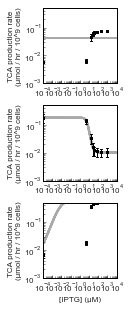

In [165]:
## IPTG x TCA production rate transfer function
rows = 3
cols = 1

fig3_iptg_tf_beta, ax3_iptg_tf_beta = plt.subplots(rows,cols, figsize=(1.69*cols,1.45*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

tfs_means_iptg = dict()

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3_iptg_tf_beta[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        ## transfer functions
        if s in ['AJT462','AJT437']:
            tfs_means_iptg[s] = build_transfer_functions([iptg_plot_conc], # x data
                                    [TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'activator') # name, kind
        if s == 'AJT463':
#             tfs_means_iptg[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
#                                     [TCA_rate_means_all[s].tolist()], # y data
#                                     [s], kind = 'repressor') # name, kind
            tfs_means_iptg[s] = build_transfer_functions([iptg_plot_conc], # x data
                                    [TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'repressor') # name, kind

        # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
        FP.scatter(tfs_means_iptg[s][0].inputs, tfs_means_iptg[s][0].outputs, color = 'black',
           linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
    
        ## errorbars
        FP.errorbar(tfs_means_iptg[s][0].inputs, tfs_means_iptg[s][0].outputs, yerr = TCA_rate_stdevs_all[s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        ## fitting line
        xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line
        
        if s in ['AJT462','AJT437']:
            FP.plot(xvals, tfs_means_iptg[s][0].hill_eqn_act(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
        
        if s == 'AJT463':
            FP.plot(xvals, tfs_means_iptg[s][0].hill_eqn_rep(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
    
        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        if s == 'AJT437':
            FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)

        FP.set_ylim(0.001,0.5)
        FP.set_xlim(0.0001, 10000)

#         if fig_pos[s]['fig_col'] == 0:
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [ ]:
# fig3_iptg_tf_beta.savefig('AJT462_463_437_TFs_IPTGxTCArate_ErrorBars_Yadjusted.pdf', bbox_inches = "tight", transparent = True)


In [186]:
def ftca_3copy(x):
#    PPhlF-TCA (CAV drawn plot)
    ymin = 0.0067
#     ymin = 0
    ymax = 0.63
    k = 20
    n = 1.7
    return hill_eqn_act(x, ymax, ymin, k, n)

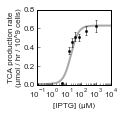

In [189]:
## 3 copy circuit IPTG x TCA production rate transfer function

## looked best when allowed ymax to float between ymax measured and ymax * 5
## note that n is likely super high (upper limit was 20)

rows = 1
cols = 1

fig_tca_3copy, ax_tca_3copy = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

strains_subset = ['AJT437']

xvals = np.logspace(-1, 4, 1000)

for s in strains_subset:

    # set figure position within subplot
    FP = ax_tca_3copy

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    FP.scatter(iptg_plot_conc2, TCA_rate_means_all[s], color ='black',
                  linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
    
    FP.errorbar(iptg_plot_conc2, TCA_rate_means_all[s], yerr = TCA_rate_stdevs_all[s], 
                   zorder=2, fmt = 'none', # plots just error bars, no marker or line
                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
    
    FP.plot(xvals, ftca_3copy(xvals), color = 'darkgrey', zorder = 0, linewidth = 2)

    FP.set_xscale('log')
    FP.set_yscale('linear')

    FP.grid(False)

#     FP.set_ylim(0.001,0.5)
    FP.set_ylim(0,0.8)
    FP.set_xlim(0.1, 10000)

    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#     ## set y ticks
#     y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
#     FP.yaxis.set_major_locator(y_major)
#     y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
#     FP.yaxis.set_minor_locator(y_minor)
#     FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    

In [190]:
# fig_tca_3copy.savefig('AJT437_TF_IPTGxTCArate_ErrorBars_Ylinear.pdf', bbox_inches = "tight", transparent = True)

In [569]:
# ## OLD DATA FROM SYNLOGIC CALCULATION
# syn_1618 = [0.791108120, 0.723308906, 0.933193197, 0.926511697]
# syn_7664 = [1.607038514, 1.576787920]
# syn_7696 = [1.321078476, 1.284198378, 1.673055004, 1.671327991, 1.954241224, 1.811333223]

## NEW DATA FROM MY CALCULATION ADJUSTING FOR OD600 AND CORRECTLY ADJUSTING OD290 DILUTION FACTOR
syn_1618 = [0.959854931, 0.8819248, 1.128496332, 1.120816447]
syn_7664 = [1.897705959, 1.862935161]
syn_7696 = [1.569016261, 1.526625343, 1.973586983, 1.971601909, 2.302421655, 2.137852685]
syn_index = ['SYNB1618','SYN7664','SYN7696']

syn_dict = {'SYNB1618':syn_1618,'SYN7664':syn_7664,'SYN7696':syn_7696}

syn_data = pd.DataFrame.from_dict(syn_dict, orient = 'index')
syn_means = np.mean(syn_data, axis = 1)
syn_stdevs = np.std(syn_data,axis = 1)
display(syn_data,syn_means)

,0,1,2,3,4,5
SYNB1618,0.959855,0.881925,1.128496,1.120816,NaN,NaN
SYN7664,1.897706,1.862935,NaN,NaN,NaN,NaN
SYN7696,1.569016,1.526625,1.973587,1.971602,2.302422,2.137853


SYNB1618    1.022773
SYN7664     1.880321
SYN7696     1.913517
dtype: float64

In [570]:
syn_stdevs

SYNB1618    0.105578
SYN7664     0.017385
SYN7696     0.281934
dtype: float64

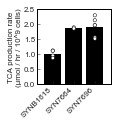

In [572]:
rows = 1
cols = 1

fig_syn, ax_syn = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

FP = ax_syn

# make plot borders black and specified thickness
for spine in FP.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

for i in syn_index:
    sns.scatterplot(x = syn_index.index(i), y = syn_data.loc[i,:], ax = FP, x_jitter = True, 
                    color = 'white', edgecolor='black', linewidth = 0.5, zorder = 1, size = 2.5, legend=False)
    sns.barplot(x = syn_index, y = syn_means, ax = FP, color = 'black', zorder = 0, linewidth=0) #linewidth=0 gets rid of white border around bars
    
    
FP.grid(False)

FP.set_xlim(-0.75, 2.75)

FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)
FP.set_xticklabels(FP.get_xticklabels(), size = 8, rotation = 45, ha = 'right')

FP.set_yticks(np.arange(0,3.0,0.5))

FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

In [573]:
# fig_syn.savefig('Synlogic_TCArate_plasmid_and_genome.pdf', bbox_inches = "tight", transparent = True)


In [ ]:
hill_params = dict()
hill_params_df = dict()

for s in strains:
    hill_params[s] = ({'Strain': s,
                     'Max inducer (uM)': round(max(tfs_means_iptg[s][0].inputs), 2),
                     'ymax (umol / hr / 10^9 cells)' : round(tfs_means_iptg[s][0].ymax,2),
#                      'ymin (RPU * 10^-3)' : round(min(tfs_means_RPU[s][0].outputs)/(1*10**-3),1),
                     'ymin (umol / hr / 10^9 cells)' : round(tfs_means_iptg[s][0].ymin,4),
                     'K (uM)': round(tfs_means_iptg[s][0].kd, 2), 
                     'n': round(tfs_means_iptg[s][0].n, 2),
                     'fold-change': round((max(tfs_means_iptg[s][0].outputs))/(min(tfs_means_iptg[s][0].outputs)),2)})
    hill_params_df[s] = pd.DataFrame.from_dict(hill_params[s], orient = 'index')

hill_params_df_all = pd.concat([hill_params_df['AJT462'], hill_params_df['AJT463'], hill_params_df['AJT437']], axis = 1)
                                

In [ ]:
hill_params_df_all

In [ ]:
%store -r means_RNAP_AJT312

In [ ]:
TCA_rate_means_all['AJT463']

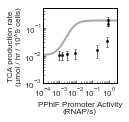

In [135]:
## PPhlF RNAP/s x TCA production rate transfer function

## looked best when allowed ymax to float between ymax measured and ymax * 5
## note that n is likely super high (upper limit was 20)

## limiting kd to 2 and n to 6 also looked nice

## Chris liked: bnds_act = ((0.5,0.9),(2.5,3),(max(self.outputs)*1.25,max(self.outputs)*2))

rows = 1
cols = 1

fig3_phlf_rnap, ax3_phlf_rnap = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

tfs_means_phlf = dict()

for s in ['AJT463']:

    # set figure position within subplot
    FP = ax3_phlf_rnap

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    if s == 'AJT463':
#             tfs_means_iptg[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
#                                     [TCA_rate_means_all[s].tolist()], # y data
#                                     [s], kind = 'repressor') # name, kind
        tfs_means_phlf[s] = build_transfer_functions([means_RNAP_AJT312], # x data
                                [TCA_rate_means_all[s].tolist()], # y data
                                [s], kind = 'activator') # name, kind

    # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
    FP.scatter(tfs_means_phlf[s][0].inputs, tfs_means_phlf[s][0].outputs, color = 'black',
       linewidths = 0.5, marker = 'o', s = 5, zorder = 1)

    ## errorbars
    FP.errorbar(tfs_means_phlf[s][0].inputs, tfs_means_phlf[s][0].outputs, yerr = TCA_rate_stdevs_all[s],
                                            zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                            c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,


#                         # plot best-fit line
#                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
#                                 linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

    ## fitting line
    xvals_phlf = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
    
    xvals_iptg = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    if s == 'AJT463':
        FP.plot(xvals_phlf, tfs_means_phlf[s][0].hill_eqn_act(xvals_phlf),
                                  color = 'darkgrey',
                                  zorder = 0, linewidth = 2)

    FP.set_xscale('log')
    FP.set_yscale('log')

    FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:

    FP.set_xlabel('PPhlF Promoter Activity\n(RNAP/s)', size = 8, labelpad = 2)

    FP.set_ylim(0.001,0.5)
    FP.set_xlim(0.0001, 3)

#         if fig_pos[s]['fig_col'] == 0:
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 6)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ## set y ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [ ]:
# fig3_phlf_rnap.savefig('AJT463_TFs_PhlFactivityxTCArate_ErrorBars_CAVdrawn_Yadjusted.pdf', bbox_inches = "tight", transparent = True)


In [ ]:
params = pd.DataFrame(np.array([[tfs_means_phlf['AJT463'][0].ymax, tfs_means_phlf['AJT463'][0].ymin, tfs_means_phlf['AJT463'][0].kd, tfs_means_phlf['AJT463'][0].n]]),
                     columns = ['ymax\n(TCA prod. rate)','ymin\n(TCA prod. rate)','Kd\n(RNAP/s)','n'])

params

In [ ]:
## PPhlF RNAP/s x TCA production rate transfer function

## looked best when allowed ymax to float between ymax measured and ymax * 3 and restricted kd below 1
## note that n is likely super high (upper limit was 20)

## to make less steep, need to set upper bound of kd to 2 and n to 10

rows = 1
cols = 1

fig3_phlf_rnap2, ax3_phlf_rnap2 = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

tfs_means_phlf = dict()

for s in ['AJT463']:

    # set figure position within subplot
    FP = ax3_phlf_rnap2

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    if s == 'AJT463':
#             tfs_means_iptg[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
#                                     [TCA_rate_means_all[s].tolist()], # y data
#                                     [s], kind = 'repressor') # name, kind
        tfs_means_phlf[s] = build_transfer_functions([means_RNAP_AJT312], # x data
                                [TCA_rate_means_all[s].tolist()], # y data
                                [s], kind = 'activator') # name, kind

    # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
    FP.scatter(tfs_means_iptg[s][0].inputs, tfs_means_iptg[s][0].outputs, color = 'black',
       linewidths = 0.5, marker = 'o', s = 5, zorder = 1)

    ## errorbars
    FP.errorbar(tfs_means_iptg[s][0].inputs, tfs_means_iptg[s][0].outputs, yerr = TCA_rate_stdevs_all[s],
                                            zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                            c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,


#                         # plot best-fit line
#                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
#                                 linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

    ## fitting line
    xvals_phlf = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
    
    xvals_iptg = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

#     if s == 'AJT463':
#         FP.plot(xvals_iptg, np.flip(tfs_means_phlf[s][0].hill_eqn_act(xvals_iptg)),
#         FP.plot(xvals_iptg, tfs_means_phlf[s][0].hill_eqn_rep(xvals_iptg),
#                                   color = '#c20088',
#                                   zorder = 0, linewidth = 2)
        
#         FP.plot(xvals_iptg, tfs_means_iptg[s][0].hill_eqn_rep(xvals_iptg),
#                 color = 'darkgrey', zorder = 0, linewidth = 2)

    FP.set_xscale('log')
    FP.set_yscale('log')

    FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:

    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)

    FP.set_ylim(0.001,0.5)
    FP.set_xlim(0.0001, 10000)

#         if fig_pos[s]['fig_col'] == 0:
    FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ## set y ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 4)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    
    
test_strains = ['AJT269','AJT312','AJT463']

for s in test_strains: 
        
    ## transfer functions
    if s == 'AJT269':
        tfs_means_iptg_test= build_transfer_functions([iptg_plot_conc], # x data
                                [AJT269_means_RNAP_store.tolist()], # y data
                                [s], kind = 'activator') # name, kind
        
    if s == 'AJT312':
        tfs_means_rnap_test = build_transfer_functions([tfs_means_iptg_test[0].outputs], # x data
                                [means_RNAP_AJT312.tolist()], # y data
                                [s], kind = 'repressor') # name, kind
        
    if s == 'AJT463':
#             tfs_means_iptg[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
#                                     [TCA_rate_means_all[s].tolist()], # y data
#                                     [s], kind = 'repressor') # name, kind
        tfs_means_tca_test = build_transfer_functions([tfs_means_rnap_test[0].outputs], # x data
                                [TCA_rate_means_all[s].tolist()], # y data
                                [s], kind = 'activator') # name, kind
    
#         FP.scatter(tfs_means_iptg_test[0].inputs, tfs_means_tca_test[0].outputs, color = 'black',
#               linewidths = 0.5, marker = 'o', s=5, zorder = 1)
        
        FP.errorbar(tfs_means_iptg_test[0].inputs, tfs_means_tca_test[0].outputs, yerr = TCA_rate_stdevs_all[s],
                                            zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                            c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)
        
#         FP.plot(xvals, tfs_means_tca_test[0].hill_eqn_act(tfs_means_rnap_test[0].hill_eqn_rep(tfs_means_iptg_test[0].hill_eqn_act(xvals))),
#                                   color = 'darkgrey',
#                                   zorder = 0, linewidth = 2)
        
        FP.plot(xvals, tfs_means_RNAP['AJT462'][0].hill_eqn_act(tfs_means_rnap_test[0].hill_eqn_rep(tfs_means_iptg_test[0].hill_eqn_act(xvals))),
                                  color = 'darkgrey',
                                  zorder = 0, linewidth = 2)

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [ ]:
# fig3_phlf_rnap2.savefig('AJT463_TFs_IPTGxTCArate_ErrorBars_withPrediction_LinearCombination_correct.pdf', bbox_inches = "tight", transparent = True)

In [ ]:
test_strains = ['AJT269','AJT312','AJT463']

In [ ]:
## TESTING 

## IPTG x TCA production rate transfer function
rows = 3
cols = 1

fig4, ax4 = plt.subplots(rows,cols, figsize=(1.69*cols,1.45*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

for s in test_strains:

    # set figure position within subplot
    FP = ax4[test_strains.index(s)]

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

        
    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line
        
    ## transfer functions
    if s == 'AJT269':
        tfs_means_iptg_test= build_transfer_functions([iptg_plot_conc], # x data
                                [AJT269_means_RNAP_store.tolist()], # y data
                                [s], kind = 'activator') # name, kind
        
        FP.scatter(tfs_means_iptg_test[0].inputs, tfs_means_iptg_test[0].outputs, color = 'black',
           linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
        
        FP.plot(xvals, tfs_means_iptg_test[0].hill_eqn_act(xvals),
                                  color = 'darkgrey',
                                  zorder = 0, linewidth = 2)
        
    if s == 'AJT312':
        tfs_means_rnap_test = build_transfer_functions([tfs_means_iptg_test[0].outputs], # x data
                                [means_RNAP_AJT312.tolist()], # y data
                                [s], kind = 'repressor') # name, kind
        
        FP.scatter(tfs_means_iptg_test[0].inputs, tfs_means_rnap_test[0].outputs, color = 'black',
              linewidths = 0.5, marker = 'o', s=5, zorder = 1)
        
        FP.plot(xvals, tfs_means_rnap_test[0].hill_eqn_rep(tfs_means_iptg_test[0].hill_eqn_act(xvals)),
                                  color = 'darkgrey',
                                  zorder = 0, linewidth = 2)
        
    if s == 'AJT463':
#             tfs_means_iptg[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
#                                     [TCA_rate_means_all[s].tolist()], # y data
#                                     [s], kind = 'repressor') # name, kind
        tfs_means_tca_test = build_transfer_functions([tfs_means_rnap_test[0].outputs], # x data
                                [TCA_rate_means_all[s].tolist()], # y data
                                [s], kind = 'activator') # name, kind
    
        FP.scatter(tfs_means_iptg_test[0].inputs, tfs_means_tca_test[0].outputs, color = 'black',
              linewidths = 0.5, marker = 'o', s=5, zorder = 1)
        
#         FP.plot(xvals, tfs_means_tca_test[0].hill_eqn_act(tfs_means_rnap_test[0].hill_eqn_rep(tfs_means_iptg_test[0].hill_eqn_act(xvals))),
#                                   color = 'darkgrey',
#                                   zorder = 0, linewidth = 2)
        
        FP.plot(xvals, tfs_means_RNAP['AJT462'][0].hill_eqn_act(tfs_means_rnap_test[0].hill_eqn_rep(tfs_means_iptg_test[0].hill_eqn_act(xvals))),
                                  color = 'darkgrey',
                                  zorder = 0, linewidth = 2)

    # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
    

    
    
    ## errorbars
#     FP.errorbar(tfs_means_iptg[s][0].inputs, tfs_means_iptg[s][0].outputs, yerr = TCA_rate_stdevs_all[s],
#                                             zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                                             c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,


#                         # plot best-fit line
#                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
#                                 linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


    FP.set_xscale('log')
    FP.set_yscale('log')

    FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        
    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)

    FP.set_ylim(0.0001,3)
    FP.set_xlim(0.0001, 10000)

#         if fig_pos[s]['fig_col'] == 0:
#     FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#                         FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)